In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Evaluation of Frith cost function in quality alignment-score mode

The following notebook examines the clustering quality of the different variants of the Frith cost function when running GeFaST in quality alignment-score mode.
The evaluation uses the results on the Callahan data sets and on the Franzén data sets:
 - Callahan et al., *DADA2: High-resolution sample inference from Illumina amplicon data* (https://doi.org/10.1038/nmeth.3869)
 - Franzén et al., *Improved OTU-picking using long-read 16S rRNA gene amplicon sequencing and generic hierarchical clustering* (https://doi.org/10.1186/s40168-015-0105-6)
 
This evaluation relies on the CSV outputs of the notebooks of the evaluations specific to the different tools and data sets.
The required files are listed below.
The variant considered best is included in the overall evaluation of the quality-weighted clustering methods in `quality_weighted_overall.ipynb`.
 
### GeFaST variants
GeFaST is evaluated in alignment-score mode (as a reference) and in quality alignment-score mode using the Frith cost function with different boosting functions (`linear`, `mult`, `root`).

The different (quality-weighted) variants are usually referred to by an abbreviation hinting at the mode, quality-weighting technique and boosting function (including parameters): `<variant>_<boosting>_qas-f`, e.g. `mw_unboosted_qas-f` and `v1_root2_qas-f`.
The completely unweighted variant in alignment-score mode is denoted as `original_as`.

Values of `<variant>`:

| Abbreviation | Description |
| --: | :-- |
| muw | matches in an alignment are *not* quality-weighted, unboosted variant |
| mw  | matches in an alignment are quality-weighted, unboosted variant |
| v1  | matches in an alignment are quality-weighted, inner boosting |
| v2  | matches in an alignment are *not* quality-weighted, inner boosting |
| v3  | matches in an alignment are quality-weighted, outer boosting |
| v4  | matches in an alignment are *not* quality-weighted, outer boosting |

Values of `<boosting>`:

| Abbreviation | Description |
| --: | :-- |
| unboosted    | unboosted variant |
| linear*x*    | linear boosting starting at `linear_start` = *x*  |
| mult*x*      | multiplicative boosting with `mult_factor` = *x* |
| root*x*      | unshifted root boosting with `root_degree` = *x* |
| rootshift*x* | shifted root boosting with `root_degree` = *x* and `root_shift` = *full* |


### Other tools
As further references, USEARCH is evaluated for the `cluster_fast` command with the option `-sort size`,
while VSEARCH is included in the variant using the `cluster_size` command. 
In addition, UPARSE and Swarm are included.

In [ ]:
# Required files:
#
# analyses
# |- quality_weighted_callahan  # evaluation of GeFaST's quality-weighted clustering methods on Callahan data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     |- df_joined_nbest_avg.csv
# |     |- df_max_lvls.csv
# |     |- df_mean_lvls.csv
# |     \- df_nbest_lvls.csv
# |
# |- quality_weighted_franzen  # evaluation of GeFaST's quality-weighted clustering methods on Franzén data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     |- df_joined_nbest_avg.csv
# |     |- df_max_lvls.csv
# |     |- df_mean_lvls.csv
# |     \- df_nbest_lvls.csv
# |
# |- uvsearch_callahan  # evaluation of USEARCH, VSEARCH and UPARSE on Callahan data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# |- uvsearch_franzen  # evaluation of USEARCH, VSEARCH and UPARSE on Franzén data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# |- swarm_callahan  # evaluation of Swarm on Callahan data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# \- swarm_franzen  # evaluation of Swarm on Franzén data
#    \- evaluation
#       |- df_joined_max_avg.csv
#       |- df_joined_mean_avg.csv
#       \- df_joined_nbest_avg.csv

**Configuration**

In [2]:
qw_option = 'f'      # quality-weighted cost function
mode = 'as'          # quality-unweighted mode
qmode = 'qas'        # quality-weighted mode

rename_map = {'adjrandindex': 'Adjusted Rand index', 'precision': 'Precision', 'recall': 'Recall'}

### Load the evaluation data

**GeFaST**

In [3]:
# Callahan data sets
callahan_gefast_dir = '../quality_weighted_callahan/evaluation'
df_callahan_gefast_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_max_lvls = pd.read_csv('%s/df_max_lvls.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_mean_lvls = pd.read_csv('%s/df_mean_lvls.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_nbest_lvls = pd.read_csv('%s/df_nbest_lvls.csv' % callahan_gefast_dir, sep = ';')

# Franzén data sets
franzen_gefast_dir = '../quality_weighted_franzen/evaluation'
df_franzen_gefast_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_max_lvls = pd.read_csv('%s/df_max_lvls.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_mean_lvls = pd.read_csv('%s/df_mean_lvls.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_nbest_lvls = pd.read_csv('%s/df_nbest_lvls.csv' % franzen_gefast_dir, sep = ';')

**USEARCH / VSEARCH / UPARSE**

In [4]:
# Callahan data sets
callahan_uvsearch_dir = '../uvsearch_callahan/evaluation'
df_callahan_uvsearch_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % callahan_uvsearch_dir, sep = ';')
df_callahan_uvsearch_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % callahan_uvsearch_dir, sep = ';')
df_callahan_uvsearch_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % callahan_uvsearch_dir, sep = ';')

# Franzén data sets
franzen_uvsearch_dir = '../uvsearch_franzen/evaluation'
df_franzen_uvsearch_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % franzen_uvsearch_dir, sep = ';')
df_franzen_uvsearch_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % franzen_uvsearch_dir, sep = ';')
df_franzen_uvsearch_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % franzen_uvsearch_dir, sep = ';')

**Swarm**

In [5]:
# Callahan data sets
callahan_swarm_dir = '../swarm_callahan/evaluation'
df_callahan_swarm_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % callahan_swarm_dir, sep = ';')
df_callahan_swarm_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % callahan_swarm_dir, sep = ';')
df_callahan_swarm_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % callahan_swarm_dir, sep = ';')

# Franzén data sets
franzen_swarm_dir = '../swarm_franzen/evaluation'
df_franzen_swarm_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % franzen_swarm_dir, sep = ';')
df_franzen_swarm_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % franzen_swarm_dir, sep = ';')
df_franzen_swarm_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % franzen_swarm_dir, sep = ';')

## Clustering quality

Comparison of the clustering quality (adjusted Rand index (ARI), precision, recall) of the different tools / modes / refinement options on the different data sets.
For the Franzén data, the 10 data sets of each combination of complexity (e.g. LC) and region (e.g. V4) were averaged.

Considers the clustering quality in three different ways:   
1) *Maximum*: ARI / precision / recall of the respective run (threshold) with the highest ARI on that data set (peak performance).   
2) *Average*: Average ARI / precision / recall over all runs (thresholds) on that data set (robustness of performance). Indicates how sensitive the clustering quality is to not choosing the 'optimal' threshold.   
3) *N-best average*: Average ARI / precision / recall over the respective 5 runs (thresholds) with the highest ARI on that data set (mix of peak performance and robustness of performance). Ignores the worst results for thresholds that are way off but still considers not just the optimal threshold choice.


### Comparison of unboosted quality-weighted cost function with unweighted mode

Compares the quality alignment-score mode, using the unboosted variants of the Frith cost function, with the alignment-score mode.

In [6]:
def avg_diff_multiple(portions, ref, cmps, metric = 'adjrandindex'):
    
    ref_mode, ref_v, ref_qw, ref_b, ref_bp = ref
    
    df_columns = ['data_group'] + ['%s / %s / %s / %s / %s' % (m, v, q, b, bp) for m, v, q, b, bp in cmps]
    
    rows = []
    for df, data_set_groups, gt in portions:
        for (name, dsg) in data_set_groups:            
            ref_grp = df.loc[df['data_set'].isin(dsg) & (df['gt'] == gt) & (df['mode'] == ref_mode) & (df['v_opt'] == ref_v) & (df['qw_opt'] == ref_qw) & (df['b_opt'] == ref_b) & (df['b_param'] == ref_bp)]
            
            row = [name]
            for mode, v, qw, b, bp in cmps:
                cmp_grp = df.loc[df['data_set'].isin(dsg) & (df['gt'] == gt) & (df['mode'] == mode) & (df['v_opt'] == v) & (df['qw_opt'] == qw) & (df['b_opt'] == b) & (df['b_param'] == bp)]
                
                row.append(cmp_grp[metric].mean() - ref_grp[metric].mean())
            
            rows.append(row)
            
    return pd.DataFrame(rows, columns = df_columns)

-- *Maximum clustering quality*

In [7]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, 'muw', qw_option, 'unboosted', 'none'), (qmode, 'mw', qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.039624,0.031793
1,V4,0.016827,0.017116
2,paired,0.000007,-0.000951
3,single,0.000000,-0.019022


Precision:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.031138,0.038956
1,V4,0.020560,0.020161
2,paired,-0.000002,0.000113
3,single,0.000000,-0.025760


Recall:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,-0.002128,-0.018072
1,V4,-0.006954,-0.005904
2,paired,0.000001,-0.000451
3,single,0.000000,0.003106


-- *Average clustering quality*

In [8]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, 'muw', qw_option, 'unboosted', 'none'), (qmode, 'mw', qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.120658,-0.101693
1,V4,0.004055,-0.047191
2,paired,-0.000019,-0.000335
3,single,-0.001836,0.001479


Precision:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,-0.032902,0.036340
1,V4,-0.008266,0.033137
2,paired,-0.000061,0.000253
3,single,-0.000528,0.002761


Recall:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.158769,-0.146258
1,V4,0.015032,-0.080411
2,paired,0.000001,-0.000176
3,single,-0.000019,-0.004404


-- *N-best average clustering quality*

In [9]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, 'muw', qw_option, 'unboosted', 'none'), (qmode, 'mw', qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.098086,-0.111228
1,V4,0.007288,0.006925
2,paired,0.000000,-0.001045
3,single,-0.000371,-0.006981


Precision:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,-0.037644,0.054700
1,V4,-0.001849,-0.000798
2,paired,-0.000007,0.000193
3,single,-0.000258,0.002678


Recall:


,data_group,qas / muw / f / unboosted / none,qas / mw / f / unboosted / none
0,V3-V4,0.149221,-0.167144
1,V4,0.012117,0.010567
2,paired,0.000002,-0.000384
3,single,0.000019,-0.010835


Both work similarly well w.r.t. maximum quality but `muw` was notably more robust / better on average.

In [10]:
best_ub = 'muw'

### Comparison of boosted quality-weighted cost function with unweighted mode

Compares the quality alignment-score mode, using a large variety of boosted variants of the Frith cost function (differing in the boosting function, the boosting parameters and the weighting of matches), with the alignment-score mode and among each other to determine the best boosted variant.

In [11]:
def comparative_plot(portions, metric, modes, 
                     select_metric = None, qw_opts = ['c', 'ca', 'cb', 'f', 'ka', 'kb', 'ma', 'mb', 'mc'], 
                     usearch_opt = 'fast_size', vsearch_opt = 'size', dada2_opt = 'non-chimeric', uparse_opt = 'otus', swarm_opt = 'nf',
                     fs = (30, 10), plot_file = None):

    ratios = [len(p[4]) for p in portions]
    
    colour_palette_a = sb.color_palette('Paired')
    colour_palette_b = sb.color_palette('tab20b')
    colours = {'usearch': colour_palette_a[1], 'vsearch': colour_palette_a[5], 'dada2': colour_palette_a[11], 'uparse': colour_palette_a[3], 'swarm': colour_palette_a[7], 
               'c': colour_palette_b[8], 'ca': colour_palette_b[4], 'cb': colour_palette_b[6], 'f': colour_palette_b[16], 'ka': colour_palette_b[0], 'kb': colour_palette_b[2], 'ma': colour_palette_b[12], 'mb': colour_palette_b[14], 'mc': colour_palette_b[15]
              }
    markers = {'usearch': 'x', 'vsearch': 'x', 'uparse': 'x', 'swarm': 'x', 'gefast_ds_opt': '_', 'gefast_all_opt': 'D'}
    marker_size = 55
    width = 0.8
    
    label_map = {'precision': 'Precision', 'recall': 'Recall', 'adjrandindex': 'Adjusted Rand index', 
                 'fast_size': 'fast / size', 'size': 'size', 'nf': 'non-fastidious', 'as': 'as', 'qas': 'qas', 'lev': 'lev', 'qlev': 'qlev', 
                 'c': 'Clement', 'ca': 'Converge-A', 'cb': 'Converge-B', 'f': 'Frith',
                 'ka': 'Kim-A', 'kb': 'Kim-B', 'ma': 'Malde-A', 'mb': 'Malde-B', 'mc': 'Malde-C'}
    xticklabel_size = 15
    yticklabel_size = 15
    xlabel_size = 20
    ylabel_size = 20
    
    mode, qmode = modes
    
    
    sb.set_style('white')
    fig, axes = plt.subplots(nrows = 1, ncols = len(portions), figsize = fs, sharey = True, gridspec_kw = {'width_ratios' : ratios})
    
    legend_markers = []
    legend_labels = []
    
    # Modes (colours)
    legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
    legend_labels.append('Tool  (mode)')
    
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['usearch'], marker = markers['usearch'], markerfacecolor = colours['usearch'], mew = 1.0, linestyle = ''))
    legend_labels.append('USEARCH (%s)' % label_map[usearch_opt])
    
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['vsearch'], marker = markers['vsearch'], markerfacecolor = colours['vsearch'], mew = 1.0, linestyle = ''))
    legend_labels.append('VSEARCH (%s)' % label_map[vsearch_opt])
    
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['uparse'], marker = markers['uparse'], markerfacecolor = colours['uparse'], mew = 1.0, linestyle = ''))
    legend_labels.append('UPARSE')
    
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['swarm'], marker = markers['swarm'], markerfacecolor = colours['swarm'], mew = 1.0, linestyle = ''))
    legend_labels.append('Swarm (%s)' % label_map[swarm_opt])
    
    legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = 'black', mew = 0.3, linestyle = ':'))
    legend_labels.append('GeFaST (%s)' % label_map[mode]) 
    
    for _ in range(0, len(qw_opts) - 1):
        legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
        legend_labels.append('')  
    
    legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
    legend_labels.append('GeFaST  (%s) with q.w.' % qmode)
    for qw in qw_opts:
        legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours[qw], marker = 'o', markerfacecolor = colours[qw], mew = 0.3, linestyle = ''))
        legend_labels.append(label_map[qw])
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = 'black', marker = markers['gefast_ds_opt'], markerfacecolor = 'none', mew = 1.0, linestyle = ''))
    legend_labels.append('Data-set best')
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = 'black', marker = markers['gefast_all_opt'], markerfacecolor = 'none', mew = 1.0, linestyle = ''))
    legend_labels.append('Read-type best')

    smetric = select_metric if select_metric is not None else metric
    
    table_rows = []
    
    for i, (name, dfg, dfuv, dfs, gt, data_sets) in enumerate(portions):
        ax = axes if (len(portions) == 1) else axes[i]
        
        df_gefast = dfg.loc[dfg['mode'].isin(modes) & (dfg['gt'] == gt) & (dfg['level'] == 'qvbb')]
        df_usearch = dfuv.loc[(dfuv['tool'] == 'usearch') & (dfuv['mode'] == usearch_opt)]
        df_vsearch = dfuv.loc[(dfuv['tool'] == 'vsearch') & (dfuv['mode'] == vsearch_opt)]
        df_uparse = dfuv.loc[(dfuv['tool'] == 'uparse') & (dfuv['mode'] == uparse_opt)]
        df_swarm = dfs.loc[(dfs['tool'] == 'swarm') & (dfs['refinement'] == swarm_opt)]
        
        xtick_labels = data_sets
        xticks = range(0, len(xtick_labels))
        xlabel = name
        
        for pos, ds in enumerate(data_sets):
            grp_gefast = df_gefast.loc[df_gefast['data_set'] == ds]
            grp_gefast_all = df_gefast.loc[df_gefast['data_set'] == 'all_%s' % ds.split('_')[1]]
            grp_usearch = df_usearch.loc[df_usearch['data_set'] == ds]
            grp_vsearch = df_vsearch.loc[df_vsearch['data_set'] == ds]
            grp_uparse = df_uparse.loc[df_uparse['data_set'] == ds]
            grp_swarm = df_swarm.loc[df_swarm['data_set'] == ds]
            
            step = (width / (len(qw_opts) - 1)) if len(qw_opts) > 1 else 0.1
        
            # plot USEARCH
            ax.scatter([pos - 1.5 * step] * len(grp_usearch), grp_usearch[metric], color = colours['usearch'], marker = markers['usearch'], s = marker_size, label = 'USEARCH (%s)' % usearch_opt)
        
            # plot VSEARCH
            ax.scatter([pos + 0.0 * step] * len(grp_vsearch), grp_vsearch[metric], color = colours['vsearch'], marker = markers['vsearch'], s = marker_size, label = 'VSEARCH (%s)' % vsearch_opt)
        
            # plot UPARSE
            ax.scatter([pos + 1.5 * step] * len(grp_uparse), grp_uparse[metric], color = colours['uparse'], marker = markers['uparse'], s = marker_size, label = 'UPARSE')
        
            # plot Swarm
            ax.scatter([pos + 3.0 * step] * len(grp_swarm), grp_swarm[metric], color = colours['swarm'], marker = markers['swarm'], s = marker_size, label = 'Swarm (%s)' % swarm_opt)
        
            # plot GeFaST
            ref_val = grp_gefast.loc[grp_gefast['mode'] == mode, metric].iloc[0] # from quality-unweighted mode
            ax.hlines(y = ref_val, xmin = pos - 0.5, xmax = pos + 0.5, linestyle = ':', alpha = 0.8) # quality-unweighted reference line            
            for k, qw in enumerate(qw_opts):
                grp = grp_gefast.loc[grp_gefast['qw_opt'] == qw]
                
                best_all = grp_gefast_all.loc[grp_gefast_all['qw_opt'] == qw].nlargest(1, smetric)
                all_v_opt = best_all['v_opt'].iloc[0]
                all_b_opt = best_all['b_opt'].iloc[0]
                all_b_param = best_all['b_param'].iloc[0]
                
                best_ds = grp.nlargest(1, smetric)
                
                best_ds_val = best_ds[metric].iloc[0]
                best_all_val = grp.loc[(grp['v_opt'] == all_v_opt) & (grp['b_opt'] == all_b_opt) & (grp['b_param'] == all_b_param), metric].iloc[0]
                
                
                ax.scatter(pos - width / 2 + k * step, best_ds_val, color = colours[qw], marker = markers['gefast_ds_opt'], s = marker_size)
                ax.scatter(pos - width / 2 + k * step, best_all_val, color = colours[qw], marker = markers['gefast_all_opt'], s = marker_size, facecolors = 'none')
                
                
                table_rows.append([ds, qw, 
                                   '%s;   %f' % (mode, ref_val), 
                                   '%s / %s / %s;   %s%f' % (all_v_opt, all_b_opt, all_b_param, '+' if best_all_val > ref_val else '', best_all_val - ref_val), 
                                   '%s / %s / %s;   %s%f' % (grp.nlargest(1, smetric)['v_opt'].iloc[0], grp.nlargest(1, smetric)['b_opt'].iloc[0], grp.nlargest(1, smetric)['b_param'].iloc[0], '+' if best_ds_val > ref_val else '', best_ds_val - ref_val)])

        ax.set_xlim(-0.5, len(data_sets) - 0.5)
        
        ax.set_xticks([-0.5], minor = False)
        ax.set_xticklabels([''], minor = False)
        ax.tick_params(axis = 'x', which = 'major', direction = 'out', length = 40, color = 'black' if i > 0 else 'white', pad = -15)
        
        ax.set_xticks(xticks, minor = True)
        ax.set_xticklabels(xtick_labels, fontsize = xticklabel_size, minor = True)
        ax.tick_params(axis = 'x', which = 'minor', direction = 'out', length = 5, color = 'black')
        
        ax.tick_params(axis = 'y', which = 'major', labelsize = yticklabel_size)
        
        ax.tick_params(which = 'major', left = (i == 0))
        ax.tick_params(which = 'both', bottom = True)
        
        ax.grid(True)
        
        ax.set_xlabel(xlabel, fontsize = xlabel_size)
        if i == 0:
            ax.set_ylabel(label_map[metric], fontsize = ylabel_size)
        
        
        for pos in range(0, len(data_sets) - 1):
            ax.axvline(pos + 0.5, color = 'lightgray', zorder = 3)
        if i > 0:
            ax.axvline(-0.5, color = 'black', zorder = 3)
            
        
    plt.subplots_adjust(wspace = 0)
    
    axes[0].legend(legend_markers, legend_labels, fontsize = 10, markerscale = 1, ncol = 2, loc = 'lower left')

    if plot_file is not None:
        plt.savefig(plot_file, format = 'pdf', dpi = 1200, bbox_inches = 'tight')
        
    return pd.DataFrame(table_rows, columns = ['data_set', 'qw_opt', '%s_baseline' % mode, 'read_type_best', 'data_set_best'])

*Column descriptions:*   
`as_baseline`: ARI of alignment-score mode   
`read_type_best`: ARI of variant that attained the highest clustering quality over all data sets of the respective read type (V3-V4, V4, paired, single)   
`data_set_best`: ARI of variant that attained the highest clustering quality on that particular data set (e.g. LC_V4)

-- *Maximum clustering quality*

,data_set,qw_opt,as_baseline,read_type_best,data_set_best
8,HC_V3-V4,f,as; 0.526475,v3 / rootshift / 2; +0.083888,v3 / rootshift / 2; +0.083888
9,HC_V4,f,as; 0.485187,v3 / rootshift / 2; +0.058353,v3 / rootshift / 2; +0.058353
4,LC_V3-V4,f,as; 0.813486,v3 / rootshift / 2; +0.057633,v3 / rootshift / 2; +0.057633
5,LC_V4,f,as; 0.830749,v3 / rootshift / 2; +0.025207,v3 / rootshift / 2; +0.025207
6,MC_V3-V4,f,as; 0.702338,v3 / rootshift / 2; +0.073152,v3 / rootshift / 2; +0.073152
7,MC_V4,f,as; 0.691493,v3 / rootshift / 2; +0.037186,v3 / rootshift / 2; +0.037186
1,balanced_paired,f,as; 0.950865,v2 / linear / 5; -0.000006,v1 / rootshift / 10; +0.001760
0,balanced_single,f,as; 0.941401,v3 / mult / 1000; +0.000147,v3 / mult / 1000; +0.000147
3,hmp_paired,f,as; 0.749073,v2 / linear / 5; +0.000657,v2 / linear / 5; +0.000657
2,hmp_single,f,as; 0.909730,v3 / mult / 1000; +0.000490,v2 / mult / 1000; +0.000535


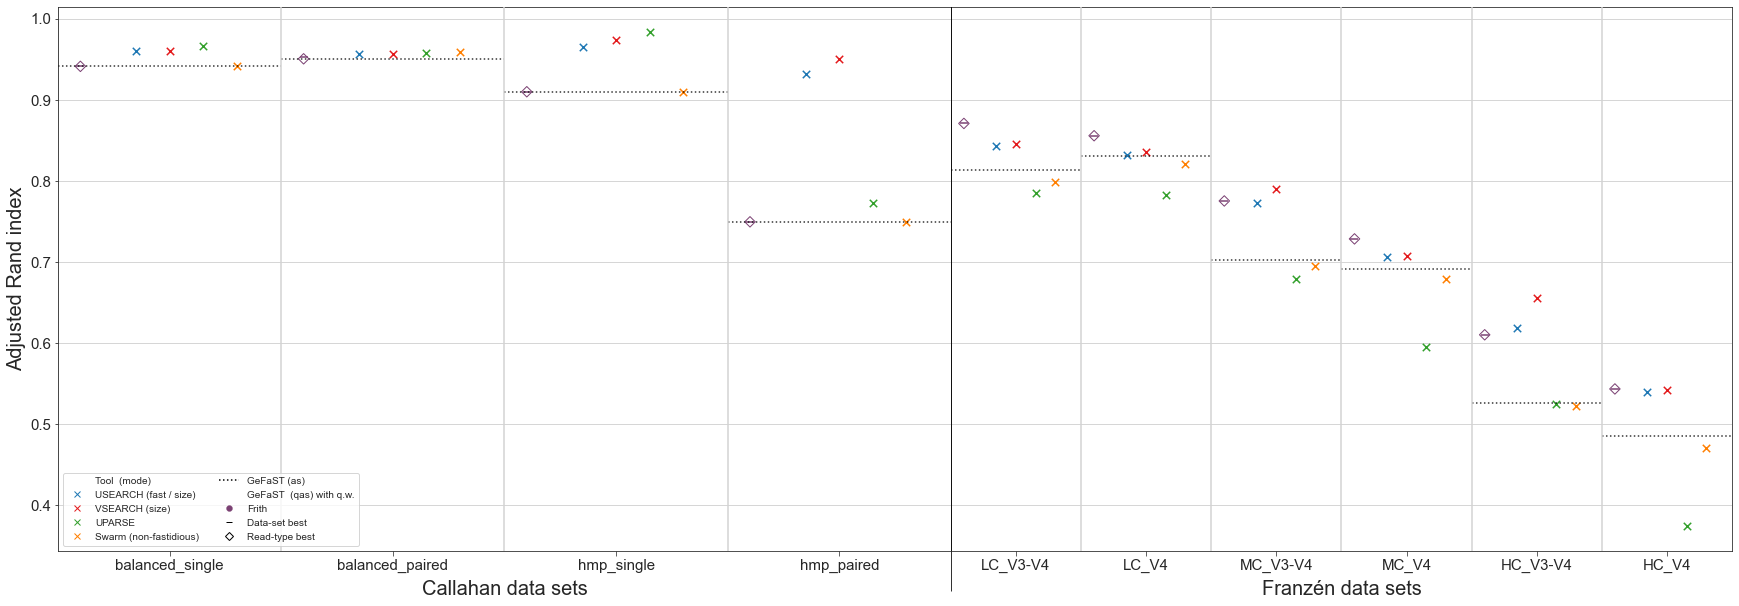

In [12]:
df = comparative_plot([('Callahan data sets', df_callahan_gefast_max_lvls, df_callahan_uvsearch_joined_max_avg, df_callahan_swarm_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                       ('Franzén data sets', df_franzen_gefast_max_lvls, df_franzen_uvsearch_joined_max_avg, df_franzen_swarm_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                      'adjrandindex', (mode, qmode), select_metric = 'adjrandindex', qw_opts = [qw_option])
df.sort_values(by = ['qw_opt', 'data_set'])

Candidates for best choice based on maximum:

In [13]:
pd.Series([v.split(';')[0] for v in df['read_type_best']] + [v.split(';')[0] for v in df['data_set_best']]).value_counts()

v3 / rootshift / 2     12
v2 / linear / 5         3
v3 / mult / 1000        3
v1 / rootshift / 10     1
v2 / mult / 1000        1
dtype: int64

-- *Average clustering quality*

,data_set,qw_opt,as_baseline,read_type_best,data_set_best
8,HC_V3-V4,f,as; 0.290869,v3 / rootshift / 3; +0.104249,v3 / rootshift / 3; +0.104249
9,HC_V4,f,as; 0.375390,v4 / linear / 35; -0.005665,muw / unboosted / none; -0.005641
4,LC_V3-V4,f,as; 0.391904,v3 / rootshift / 3; +0.170887,v3 / mult / 5; +0.170993
5,LC_V4,f,as; 0.738540,v4 / linear / 35; +0.012176,v3 / mult / 5; +0.015783
6,MC_V3-V4,f,as; 0.360724,v3 / rootshift / 3; +0.141218,v3 / rootshift / 3; +0.141218
7,MC_V4,f,as; 0.587243,v4 / linear / 35; +0.005699,v4 / linear / 35; +0.005699
1,balanced_paired,f,as; 0.926949,v4 / linear / 30; -0.000000,v1 / mult / 20; +0.000415
0,balanced_single,f,as; 0.913326,v1 / linear / 15; -0.000612,muw / unboosted / none; -0.000251
3,hmp_paired,f,as; 0.692135,v4 / linear / 30; -0.000037,v4 / linear / 30; -0.000037
2,hmp_single,f,as; 0.740704,v1 / linear / 15; +0.009924,v1 / linear / 15; +0.009924


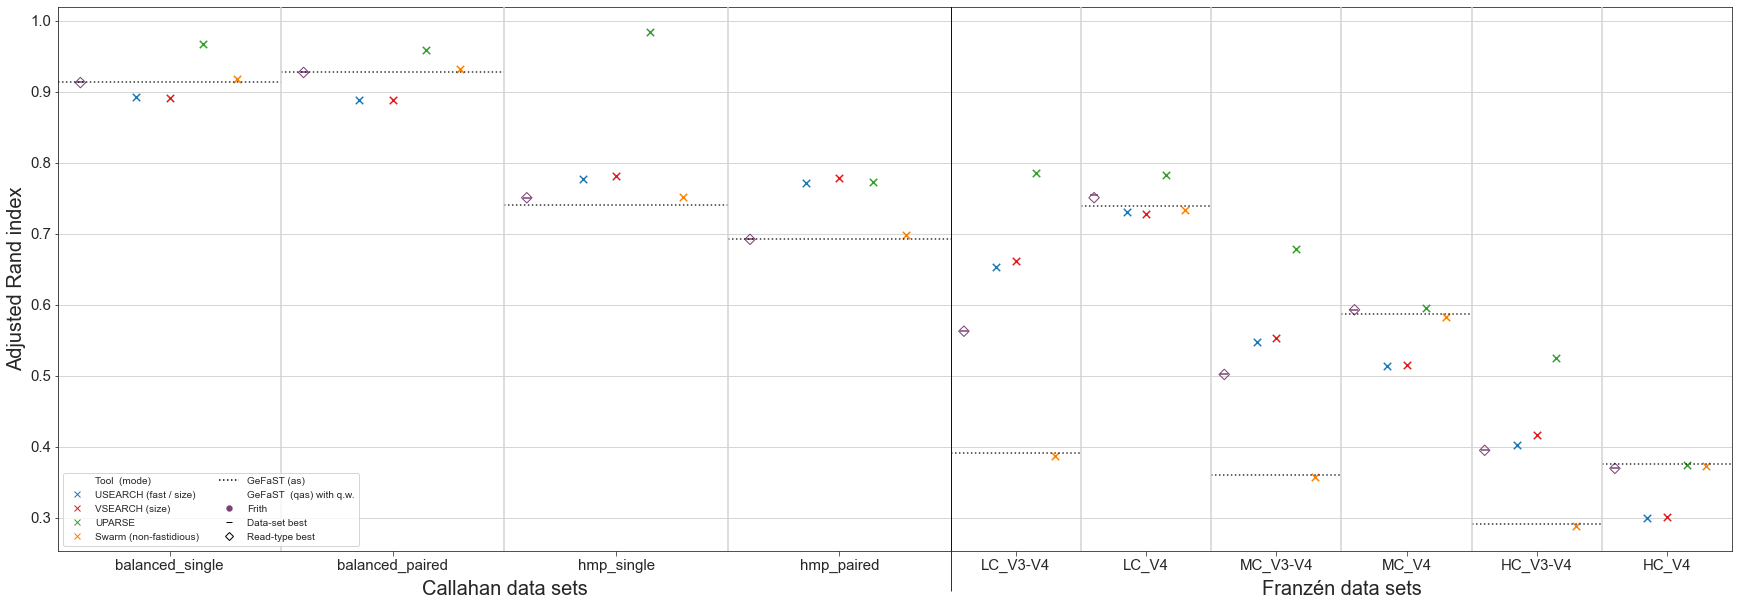

In [14]:
df = comparative_plot([('Callahan data sets', df_callahan_gefast_mean_lvls, df_callahan_uvsearch_joined_mean_avg, df_callahan_swarm_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                      ('Franzén data sets', df_franzen_gefast_mean_lvls, df_franzen_uvsearch_joined_mean_avg, df_franzen_swarm_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                     'adjrandindex', (mode, qmode), select_metric = 'adjrandindex', qw_opts = [qw_option])
df.sort_values(by = ['qw_opt', 'data_set'])

Candidates for best choice based on average:

In [15]:
pd.Series([v.split(';')[0] for v in df['read_type_best']] + [v.split(';')[0] for v in df['data_set_best']]).value_counts()

v3 / rootshift / 3        5
v4 / linear / 35          4
v4 / linear / 30          3
v1 / linear / 15          3
v3 / mult / 5             2
muw / unboosted / none    2
v1 / mult / 20            1
dtype: int64

-- *N-best average clustering quality*

,data_set,qw_opt,as_baseline,read_type_best,data_set_best
8,HC_V3-V4,f,as; 0.486434,v3 / rootshift / 2; +0.085570,v3 / rootshift / 2; +0.085570
9,HC_V4,f,as; 0.450340,v3 / rootshift / 2; +0.016314,v3 / rootshift / 2; +0.016314
4,LC_V3-V4,f,as; 0.690341,v3 / rootshift / 2; +0.158192,v3 / rootshift / 2; +0.158192
5,LC_V4,f,as; 0.814839,v3 / rootshift / 2; +0.013430,v3 / rootshift / 2; +0.013430
6,MC_V3-V4,f,as; 0.621592,v3 / rootshift / 2; +0.123085,v3 / rootshift / 2; +0.123085
7,MC_V4,f,as; 0.660170,v3 / rootshift / 2; +0.024308,v3 / rootshift / 2; +0.024308
1,balanced_paired,f,as; 0.947443,v3 / root / 7; +0.000105,v2 / mult / 100; +0.000167
0,balanced_single,f,as; 0.933077,muw / unboosted / none; -0.000311,muw / unboosted / none; -0.000311
3,hmp_paired,f,as; 0.729426,v3 / root / 7; -0.000070,v4 / rootshift / 2; +0.000021
2,hmp_single,f,as; 0.831921,muw / unboosted / none; -0.000430,muw / unboosted / none; -0.000430


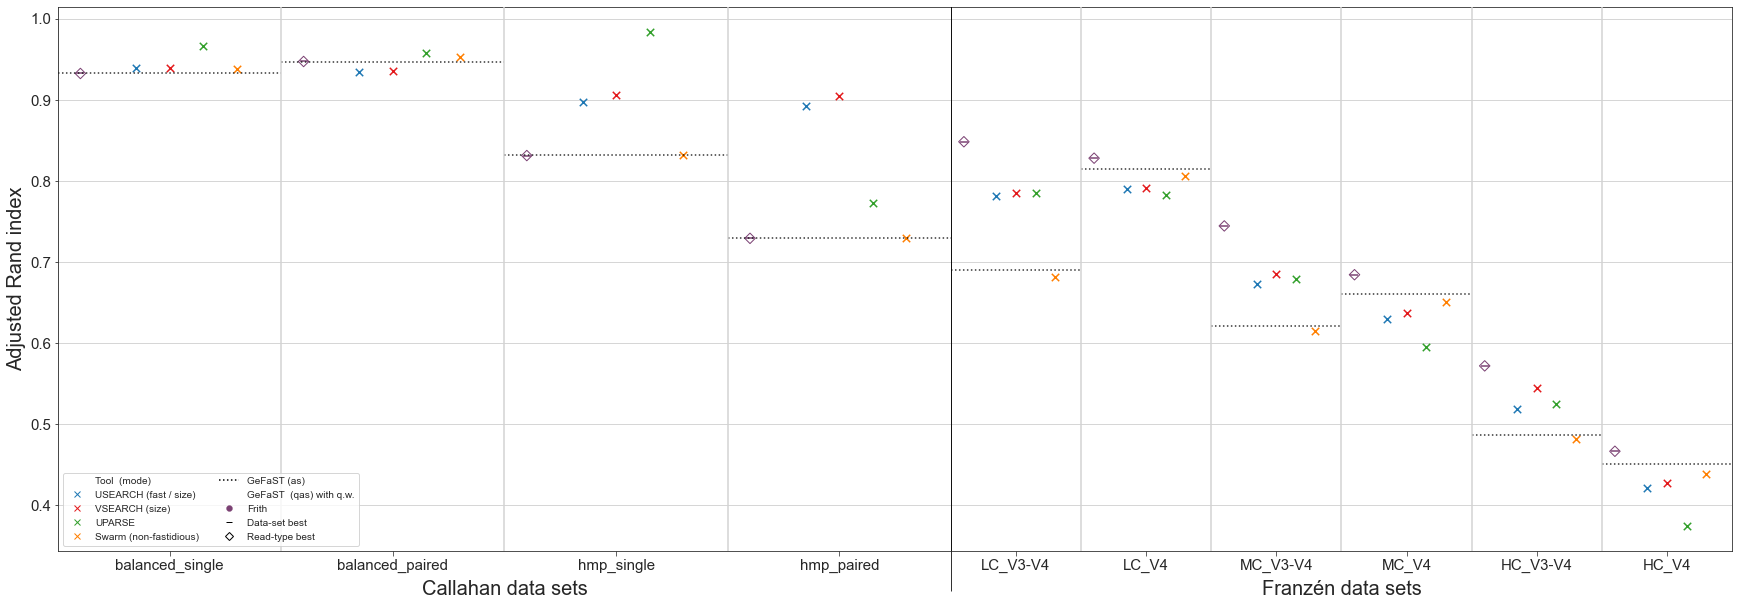

In [16]:
df = comparative_plot([('Callahan data sets', df_callahan_gefast_nbest_lvls, df_callahan_uvsearch_joined_nbest_avg, df_callahan_swarm_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                      ('Franzén data sets', df_franzen_gefast_nbest_lvls, df_franzen_uvsearch_joined_nbest_avg, df_franzen_swarm_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                     'adjrandindex', (mode, qmode), select_metric = 'adjrandindex', qw_opts = [qw_option])
df.sort_values(by = ['qw_opt', 'data_set'])

Candidates for best choice based on N-best average:

In [17]:
pd.Series([v.split(';')[0] for v in df['read_type_best']] + [v.split(';')[0] for v in df['data_set_best']]).value_counts()

v3 / rootshift / 2        12
muw / unboosted / none     4
v3 / root / 7              2
v2 / mult / 100            1
v4 / rootshift / 2         1
dtype: int64

Next, compare the performance of the candidates seen most often on the different data-set groups:

-- *Maximum clustering quality*

In [18]:
avg_diff_multiple([(df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                   (df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                  (mode, 'none', 'none', 'none', 'none'), 
                  [(qmode, 'v3', qw_option, 'rootshift', '2'),
                   (qmode, 'v3', qw_option, 'rootshift', '3'),
                   (qmode, 'v3', qw_option, 'root', '7'),
                   (qmode, 'v3', qw_option, 'mult', '1000'),
                   (qmode, 'v2', qw_option, 'linear', '5'),
                   (qmode, 'v4', qw_option, 'linear', '35'),
                   (qmode, 'v1', qw_option, 'linear', '15'),
                   (qmode, best_ub, qw_option, 'unboosted', 'none')])

,data_group,qas / v3 / f / rootshift / 2,qas / v3 / f / rootshift / 3,qas / v3 / f / root / 7,qas / v3 / f / mult / 1000,qas / v2 / f / linear / 5,qas / v4 / f / linear / 35,qas / v1 / f / linear / 15,qas / muw / f / unboosted / none
0,V3-V4,0.071558,0.055136,0.033202,-0.026528,0.036755,0.039177,-0.159187,0.039624
1,V4,0.040249,0.029513,0.018600,-0.008489,0.016958,0.016910,0.024899,0.016827
2,paired,-0.000010,0.000247,0.000320,-0.003550,0.000325,0.000008,-0.002416,0.000007
3,single,-0.009364,-0.001397,-0.000133,0.000318,0.000077,0.000000,-0.028156,0.000000


Based on maximum, `v3 / rootshift / 2` and `v3 / rootshift / 3` were the best, followed by `muw`.

-- *Average clustering quality*

In [19]:
avg_diff_multiple([(df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                   (df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                  (mode, 'none', 'none', 'none', 'none'), 
                  [(qmode, 'v3', qw_option, 'rootshift', '2'),
                   (qmode, 'v3', qw_option, 'rootshift', '3'),
                   (qmode, best_ub, qw_option, 'unboosted', 'none')])

,data_group,qas / v3 / f / rootshift / 2,qas / v3 / f / rootshift / 3,qas / muw / f / unboosted / none
0,V3-V4,0.113169,0.138784,0.120658
1,V4,-0.010664,-0.010791,0.004055
2,paired,-0.000075,-0.000026,-0.000019
3,single,-0.016423,-0.026253,-0.001836


-- *N-best average clustering quality*

In [20]:
avg_diff_multiple([(df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                   (df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                  (mode, 'none', 'none', 'none', 'none'), 
                  [(qmode, 'v3', qw_option, 'rootshift', '2'),
                   (qmode, 'v3', qw_option, 'rootshift', '10'),
                   (qmode, best_ub, qw_option, 'unboosted', 'none')])

,data_group,qas / v3 / f / rootshift / 2,qas / v3 / f / rootshift / 10,qas / muw / f / unboosted / none
0,V3-V4,0.122282,0.075334,0.098086
1,V4,0.018017,-0.018269,0.007288
2,paired,-0.000185,-0.000621,0.000000
3,single,-0.005905,-0.007064,-0.000371


`v3 / rootshift / 2` showed the best maximum quality on Franzén but was also a bit less robust.   

In [21]:
best_v = 'v3'
best_b = 'rootshift'
best_bp = '2'

**Comparison of quality metrics of the picked boosted and unboosted variant with the quality-unweighted mode**

-- *Maximum clustering quality*

In [22]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.071558,0.039624
1,V4,0.040249,0.016827
2,paired,-0.000010,0.000007
3,single,-0.009364,0.000000


Precision:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.052953,0.031138
1,V4,0.040505,0.020560
2,paired,0.000004,-0.000002
3,single,0.000154,0.000000


Recall:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.000497,-0.002128
1,V4,-0.009761,-0.006954
2,paired,-0.000005,0.000001
3,single,-0.009350,0.000000


ARI improvements only on Franzén data and even slightly worse on Callahan data.   
On Franzén, the improved ARI is accompanied by an increased precision and a largely stable recall.   
Boosted better than unboosted only on Franzén data.

-- *Average clustering quality*

In [23]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.113169,0.120658
1,V4,-0.010664,0.004055
2,paired,-0.000075,-0.000019
3,single,-0.016423,-0.001836


Precision:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,-0.021582,-0.032902
1,V4,-0.003905,-0.008266
2,paired,-0.000078,-0.000061
3,single,-0.005241,-0.000528


Recall:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.136493,0.158769
1,V4,-0.000755,0.015032
2,paired,-0.000021,0.000001
3,single,-0.003967,-0.000019


Averaged over the threshold range, the boosted variant was a bit less robust than AS (except V3-V4) and the unboosted variant.   

-- *N-best average clustering quality*

In [24]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple([(df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                               (df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                              (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = m))

Adjusted Rand index:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.122282,0.098086
1,V4,0.018017,0.007288
2,paired,-0.000185,0.000000
3,single,-0.005905,-0.000371


Precision:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,-0.024012,-0.037644
1,V4,0.006172,-0.001849
2,paired,-0.000022,-0.000007
3,single,-0.002764,-0.000258


Recall:


,data_group,qas / v3 / f / rootshift / 2,qas / muw / f / unboosted / none
0,V3-V4,0.155357,0.149221
1,V4,0.013355,0.012117
2,paired,-0.000093,0.000002
3,single,-0.001964,0.000019


Similar overall tendencies as average but the boosted variant is more robust on Franzén data.

**Absolute and relative difference of picked boosted and unboosted variant to quality-unweighted mode (ARI)**

Below tables state the following values for both the boosted and unboosted variant: the clustering quality of the alignment-score mode (`ref_val`), the clustering quality of the picked variant (`cmp_val`), the absolute difference between both (`abs_diff`), and the relative difference between both (`rel_diff`).   
For better readability, the two groups of columns separated by an additional column containing no values.

In [25]:
def show_detailed_diffs(portions, ref, cmps, metric = 'adjrandindex'):
    
    ref_mode, ref_v, ref_qw, ref_b, ref_bp = ref
    
    df_columns = ['data_group']
    for m, v, q, b, bp in cmps:
        df_columns.append('%s / %s / %s / %s / %s | ref_val' % (ref_mode, ref_v, ref_qw, ref_b, ref_bp))
        for s in ['cmp_val', 'abs_diff', 'rel_diff']: 
            df_columns.append('%s / %s / %s / %s / %s | %s' % (m, v, q, b, bp, s))
        df_columns.append('---')
    
    rows = []
    for df, data_set_groups, gt in portions:
        for (name, dsg) in data_set_groups:            
            ref_grp = df.loc[df['data_set'].isin(dsg) & (df['gt'] == gt) & (df['mode'] == ref_mode) & (df['v_opt'] == ref_v) & (df['qw_opt'] == ref_qw) & (df['b_opt'] == ref_b) & (df['b_param'] == ref_bp)]
            
            row = [name]
            for mode, v, qw, b, bp in cmps:
                cmp_grp = df.loc[df['data_set'].isin(dsg) & (df['gt'] == gt) & (df['mode'] == mode) & (df['v_opt'] == v) & (df['qw_opt'] == qw) & (df['b_opt'] == b) & (df['b_param'] == bp)]
                
                row.append(ref_grp[metric].mean())
                row.append(cmp_grp[metric].mean())
                row.append(cmp_grp[metric].mean() - ref_grp[metric].mean())
                row.append(cmp_grp[metric].mean() / ref_grp[metric].mean() - 1.0)
                row.append('---')
            
            rows.append(row)
            
    return pd.DataFrame(rows, columns = df_columns)

-- *Maximum clustering quality*

In [26]:
show_detailed_diffs([(df_franzen_gefast_joined_max_avg, [('LC_V3-V4', ['LC_V3-V4']), ('MC_V3-V4', ['MC_V3-V4']), ('HC_V3-V4', ['HC_V3-V4']), ('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('LC_V4', ['LC_V4']), ('MC_V4', ['MC_V4']), ('HC_V4', ['HC_V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4']), ('Franzén', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 'franzen'),
                     (df_callahan_gefast_joined_max_avg, [('balanced_paired', ['balanced_paired']), ('hmp_paired', ['hmp_paired']), ('paired', ['balanced_paired', 'hmp_paired']), ('balanced_single', ['balanced_single']), ('hmp_single', ['hmp_single']), ('single', ['balanced_single', 'hmp_single']), ('Callahan', ['balanced_paired', 'balanced_single', 'hmp_paired', 'hmp_single'])], 'callahan')], 
                    (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = 'adjrandindex')

,data_group,as / none / none / none / none | ref_val,qas / v3 / f / rootshift / 2 | cmp_val,qas / v3 / f / rootshift / 2 | abs_diff,qas / v3 / f / rootshift / 2 | rel_diff,---,as / none / none / none / none | ref_val,qas / muw / f / unboosted / none | cmp_val,qas / muw / f / unboosted / none | abs_diff,qas / muw / f / unboosted / none | rel_diff,---
0,LC_V3-V4,0.813486,0.871120,0.057633,0.070847,---,0.813486,0.849289,0.035803,0.044012,---
1,MC_V3-V4,0.702338,0.775491,0.073152,0.104156,---,0.702338,0.742825,0.040487,0.057646,---
2,HC_V3-V4,0.526475,0.610363,0.083888,0.159339,---,0.526475,0.569057,0.042582,0.080882,---
3,V3-V4,0.680766,0.752324,0.071558,0.105114,---,0.680766,0.720390,0.039624,0.058205,---
4,LC_V4,0.830749,0.855956,0.025207,0.030343,---,0.830749,0.844944,0.014195,0.017088,---
5,MC_V4,0.691493,0.728679,0.037186,0.053776,---,0.691493,0.710623,0.019130,0.027665,---
6,HC_V4,0.485187,0.543540,0.058353,0.120269,---,0.485187,0.502343,0.017156,0.035359,---
7,V4,0.669143,0.709392,0.040249,0.060150,---,0.669143,0.685970,0.016827,0.025147,---
8,Franzén,0.674955,0.730858,0.055903,0.082825,---,0.674955,0.703180,0.028226,0.041818,---
9,balanced_paired,0.950865,0.950865,0.000001,0.000001,---,0.950865,0.950865,0.000000,0.000001,---


-- *Average clustering quality*

In [27]:
show_detailed_diffs([(df_franzen_gefast_joined_mean_avg, [('LC_V3-V4', ['LC_V3-V4']), ('MC_V3-V4', ['MC_V3-V4']), ('HC_V3-V4', ['HC_V3-V4']), ('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('LC_V4', ['LC_V4']), ('MC_V4', ['MC_V4']), ('HC_V4', ['HC_V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4']), ('Franzén', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 'franzen'),
                     (df_callahan_gefast_joined_mean_avg, [('balanced_paired', ['balanced_paired']), ('hmp_paired', ['hmp_paired']), ('paired', ['balanced_paired', 'hmp_paired']), ('balanced_single', ['balanced_single']), ('hmp_single', ['hmp_single']), ('single', ['balanced_single', 'hmp_single']), ('Callahan', ['balanced_paired', 'balanced_single', 'hmp_paired', 'hmp_single'])], 'callahan')], 
                    (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = 'adjrandindex')

,data_group,as / none / none / none / none | ref_val,qas / v3 / f / rootshift / 2 | cmp_val,qas / v3 / f / rootshift / 2 | abs_diff,qas / v3 / f / rootshift / 2 | rel_diff,---,as / none / none / none / none | ref_val,qas / muw / f / unboosted / none | cmp_val,qas / muw / f / unboosted / none | abs_diff,qas / muw / f / unboosted / none | rel_diff,---
0,LC_V3-V4,0.391904,0.530072,0.138168,0.352557,---,0.391904,0.540110,0.148207,0.378172,---
1,MC_V3-V4,0.360724,0.476828,0.116104,0.321863,---,0.360724,0.484707,0.123983,0.343705,---
2,HC_V3-V4,0.290869,0.376104,0.085235,0.293037,---,0.290869,0.380653,0.089784,0.308674,---
3,V3-V4,0.347832,0.461002,0.113169,0.325355,---,0.347832,0.468490,0.120658,0.346885,---
4,LC_V4,0.738540,0.736079,-0.002461,-0.003332,---,0.738540,0.750653,0.012114,0.016402,---
5,MC_V4,0.587243,0.579067,-0.008176,-0.013923,---,0.587243,0.592935,0.005692,0.009694,---
6,HC_V4,0.375390,0.354034,-0.021356,-0.056891,---,0.375390,0.369749,-0.005641,-0.015027,---
7,V4,0.567058,0.556393,-0.010664,-0.018807,---,0.567058,0.571113,0.004055,0.007151,---
8,Franzén,0.457445,0.508697,0.051252,0.112041,---,0.457445,0.519801,0.062356,0.136315,---
9,balanced_paired,0.926949,0.927046,0.000097,0.000104,---,0.926949,0.926949,-0.000000,-0.000000,---


-- *N-best average clustering quality*

In [28]:
show_detailed_diffs([(df_franzen_gefast_joined_nbest_avg, [('LC_V3-V4', ['LC_V3-V4']), ('MC_V3-V4', ['MC_V3-V4']), ('HC_V3-V4', ['HC_V3-V4']), ('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('LC_V4', ['LC_V4']), ('MC_V4', ['MC_V4']), ('HC_V4', ['HC_V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4']), ('Franzén', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 'franzen'),
                     (df_callahan_gefast_joined_nbest_avg, [('balanced_paired', ['balanced_paired']), ('hmp_paired', ['hmp_paired']), ('paired', ['balanced_paired', 'hmp_paired']), ('balanced_single', ['balanced_single']), ('hmp_single', ['hmp_single']), ('single', ['balanced_single', 'hmp_single']), ('Callahan', ['balanced_paired', 'balanced_single', 'hmp_paired', 'hmp_single'])], 'callahan')], 
                    (mode, 'none', 'none', 'none', 'none'), [(qmode, best_v, qw_option, best_b, best_bp), (qmode, best_ub, qw_option, 'unboosted', 'none')], metric = 'adjrandindex')

,data_group,as / none / none / none / none | ref_val,qas / v3 / f / rootshift / 2 | cmp_val,qas / v3 / f / rootshift / 2 | abs_diff,qas / v3 / f / rootshift / 2 | rel_diff,---,as / none / none / none / none | ref_val,qas / muw / f / unboosted / none | cmp_val,qas / muw / f / unboosted / none | abs_diff,qas / muw / f / unboosted / none | rel_diff,---
0,LC_V3-V4,0.690341,0.848533,0.158192,0.229150,---,0.690341,0.827309,0.136969,0.198407,---
1,MC_V3-V4,0.621592,0.744677,0.123085,0.198015,---,0.621592,0.719515,0.097923,0.157535,---
2,HC_V3-V4,0.486434,0.572004,0.085570,0.175914,---,0.486434,0.545801,0.059367,0.122046,---
3,V3-V4,0.599456,0.721738,0.122282,0.203989,---,0.599456,0.697542,0.098086,0.163625,---
4,LC_V4,0.814839,0.828269,0.013430,0.016482,---,0.814839,0.822303,0.007464,0.009160,---
5,MC_V4,0.660170,0.684478,0.024308,0.036820,---,0.660170,0.671327,0.011156,0.016899,---
6,HC_V4,0.450340,0.466654,0.016314,0.036227,---,0.450340,0.453583,0.003244,0.007203,---
7,V4,0.641783,0.659800,0.018017,0.028074,---,0.641783,0.649071,0.007288,0.011356,---
8,Franzén,0.620619,0.690769,0.070150,0.113032,---,0.620619,0.673306,0.052687,0.084894,---
9,balanced_paired,0.947443,0.947443,-0.000000,-0.000000,---,0.947443,0.947442,-0.000001,-0.000001,---


**Overview of the clustering quality of the picked variant compared to the other variants**

In the following, plots each vertical line corresponds to a group of variants using the same boosting function, boosting type (inner or outer), depicting the range of values of the quality metrics covered by varying the boosting parameter.   
The cross marks the clustering quality of the picked variant.

In [29]:
def overview_plot(portions, modes, metric, 
                  qw_opt, pick,
                  v_opt_groups = [('Unweighted matches', 'muw', ['v2', 'v4']), ('Weighted matches', 'mw', ['v1', 'v3'])], 
                  leg_positions = [(1, 0, 'best')], fs = (40, 20), plot_file = None):
    mode, qmode = modes
    pick_v, pick_b, pick_bp = pick

    colour_palette = sb.color_palette('Paired')
    colours = dict((v, colour_palette[i]) for i, v in  enumerate('%s_%s' % (bf, io) for bf in ['linear', 'mult', 'root', 'rootshift'] for io in ['inner', 'outer']))
    colours['ref'] = 'black'
    colours['pick'] = colour_palette[9]
    markers = {'pick': 'x', 'border': '_'}
    marker_size = 80
    vwidth = 5

    label_map = {'precision': 'Precision', 'recall': 'Recall', 'adjrandindex': 'Adjusted Rand index', 
                 'c': 'Clement', 'ca': 'Converge-A', 'cb': 'Converge-B', 'f': 'Frith',
                 'ka': 'Kim-A', 'kb': 'Kim-B', 'ma': 'Malde-A', 'mb': 'Malde-B', 'mc': 'Malde-C'}
    xticklabel_size = 25
    yticklabel_size = 25
    xlabel_size = 30
    ylabel_size = 30
    title_size = 35
    leg_size = 16
    
    width = 0.7
    start_val = -0.325
    b_step = 0.2
    v_step = 0.05

    sb.set_style('white')
    fig, axes = plt.subplots(nrows = len(portions), ncols = len(v_opt_groups), figsize = fs, sharey = 'row')


    for i, (name, dfg, data) in enumerate(portions):      
        for j, (opt_name, ub_opt, v_opts) in enumerate(v_opt_groups):

            if len(portions) > 1 and len(v_opt_groups) > 1:
                ax = axes[i][j]
            elif len(portions) > 1:
                ax = axes[i]
            elif len(v_opt_groups) > 1:
                ax = axes[j]
            else:
                ax = axes

            data_sets = sorted(dfg['data_set'].unique()) if data == 'sorted' else data

            legend_markers = []
            legend_labels = []

            leg_cols = 2
            
            # Boosting functions and position (colours)
            legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
            legend_labels.append('Boosting function (type)')
            for bf in ['linear', 'mult', 'root', 'rootshift']:
                for io in ['inner', 'outer']:
                    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['%s_%s' % (bf, io)], marker = 'o', markerfacecolor = colours['%s_%s' % (bf, io)], mew = 0.3, linestyle = ''))
                    legend_labels.append('%s (%s)' % (bf, io))

            # Reference values
            legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
            legend_labels.append('Reference values')
            legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = 'black', mew = 0.3, linestyle = '--'))
            legend_labels.append('quality-unweighted mode (%s)' % mode)
            legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = 'black', mew = 0.3, linestyle = ':'))
            legend_labels.append('unboosted')
            legend_markers.append(plt.Line2D([0,0],[0,0], marker = markers['pick'], markeredgecolor = colours['pick'], markerfacecolor = colours['pick'], linestyle = ''))
            legend_labels.append('%s / %s / %s' % (pick_v, pick_b, pick_bp))
            
            for _ in range(0, 9 - 4):
                legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
                legend_labels.append('')


            for d, ds in enumerate(data_sets):
                
                    
                ax.hlines(y = dfg.loc[(dfg['mode'] == mode) & (dfg['data_set'] == ds), metric].iloc[0], xmin = d - 0.5, xmax = d + 0.5, color = colours['ref'], linestyle = '--', alpha = 0.6)
                
                df_ub = dfg.loc[(dfg['mode'] == qmode) & (dfg['data_set'] == ds) & (dfg['v_opt'] == ub_opt) & (dfg['qw_opt'] == qw_opt)]
                ax.hlines(y = df_ub[metric].iloc[0], xmin = d - 0.5, xmax = d + 0.5, colors = colours['ref'], linestyle = ':', alpha = 0.8)   
                
                df_pick = dfg.loc[(dfg['mode'] == qmode) & (dfg['data_set'] == ds) & (dfg['v_opt'] == pick_v) & (dfg['qw_opt'] == qw_opt) & (dfg['b_opt'] == pick_b) & (dfg['b_param'] == pick_bp)]
                ax.scatter(d, df_pick[metric].iloc[0], color = colours['pick'], marker = markers['pick'], s = marker_size)
                
                for k, v_opt in enumerate(v_opts):
                    io_val = 'inner' if v_opt in ['v1', 'v2'] else 'outer'
                    
                    x_values = []
                    min_values = []
                    max_values = []
                    colour_values = []

                    df_qw = dfg.loc[(dfg['mode'] == qmode) & (dfg['data_set'] == ds) & (dfg['v_opt'] == v_opt) & (dfg['qw_opt'] == qw_opt)]

                    for l, (b_opt, grp) in enumerate(df_qw.groupby(by = 'b_opt')):
                        x_val = d + start_val + b_step * l + v_step * k #+ 0.03*d
                        x_values.append(x_val)
                        min_values.append(grp[metric].min())
                        max_values.append(grp[metric].max())
                        colour_values.append(colours['%s_%s' % (b_opt, io_val)])
                    ax.vlines(x = x_values, ymin = min_values, ymax = max_values, colors = colour_values, linewidth = vwidth)
                    ax.scatter(x_values, min_values, color = colour_values, marker = markers['border'], s = marker_size)
                    ax.scatter(x_values, max_values, color = colour_values, marker = markers['border'], s = marker_size)



            xlabel = 'Data set'
            xticks = range(0, len(data_sets))
            xtick_labels = data_sets

            ax.set_xticks(xticks, minor = True)
            ax.set_xticks([x + 0.5 for x in xticks[:-1]], minor = False)

            ax.set_xticklabels(xtick_labels, fontsize = xticklabel_size, minor = True)
            ax.set_xticklabels('', minor = False)

            ax.tick_params(axis = 'x', which = 'minor', direction = 'out', length = 5, color = 'black')        
            ax.tick_params(which = 'major', left = (j == 0))
            ax.tick_params(which = 'minor', bottom = True)
            ax.tick_params(axis = 'y', labelsize = yticklabel_size)

            ax.set_xlim((xticks[0] - 0.5, xticks[-1] + 0.5))

            ax.grid(True)

            if i == (len(portions) - 1):
                ax.set_xlabel(xlabel, fontsize = xlabel_size)
            if j == 0:
                ax.set_ylabel('%s\n\n%s' % (name, label_map[metric]), fontsize = ylabel_size)

            if i == 0:
                ax.set_title(opt_name, fontsize = title_size)


            for leg_row, leg_col, leg_loc in leg_positions:
                if leg_row == i and leg_col == j:
                    ax.legend(legend_markers, legend_labels, fontsize = leg_size, markerscale = 1.5, ncol = leg_cols, loc = leg_loc)

            
        
    plt.subplots_adjust(wspace = 0.1)

    if plot_file is not None:
        plt.savefig(plot_file, format = 'pdf', dpi = 1200, bbox_inches = 'tight')

-- *Maximum clustering quality*

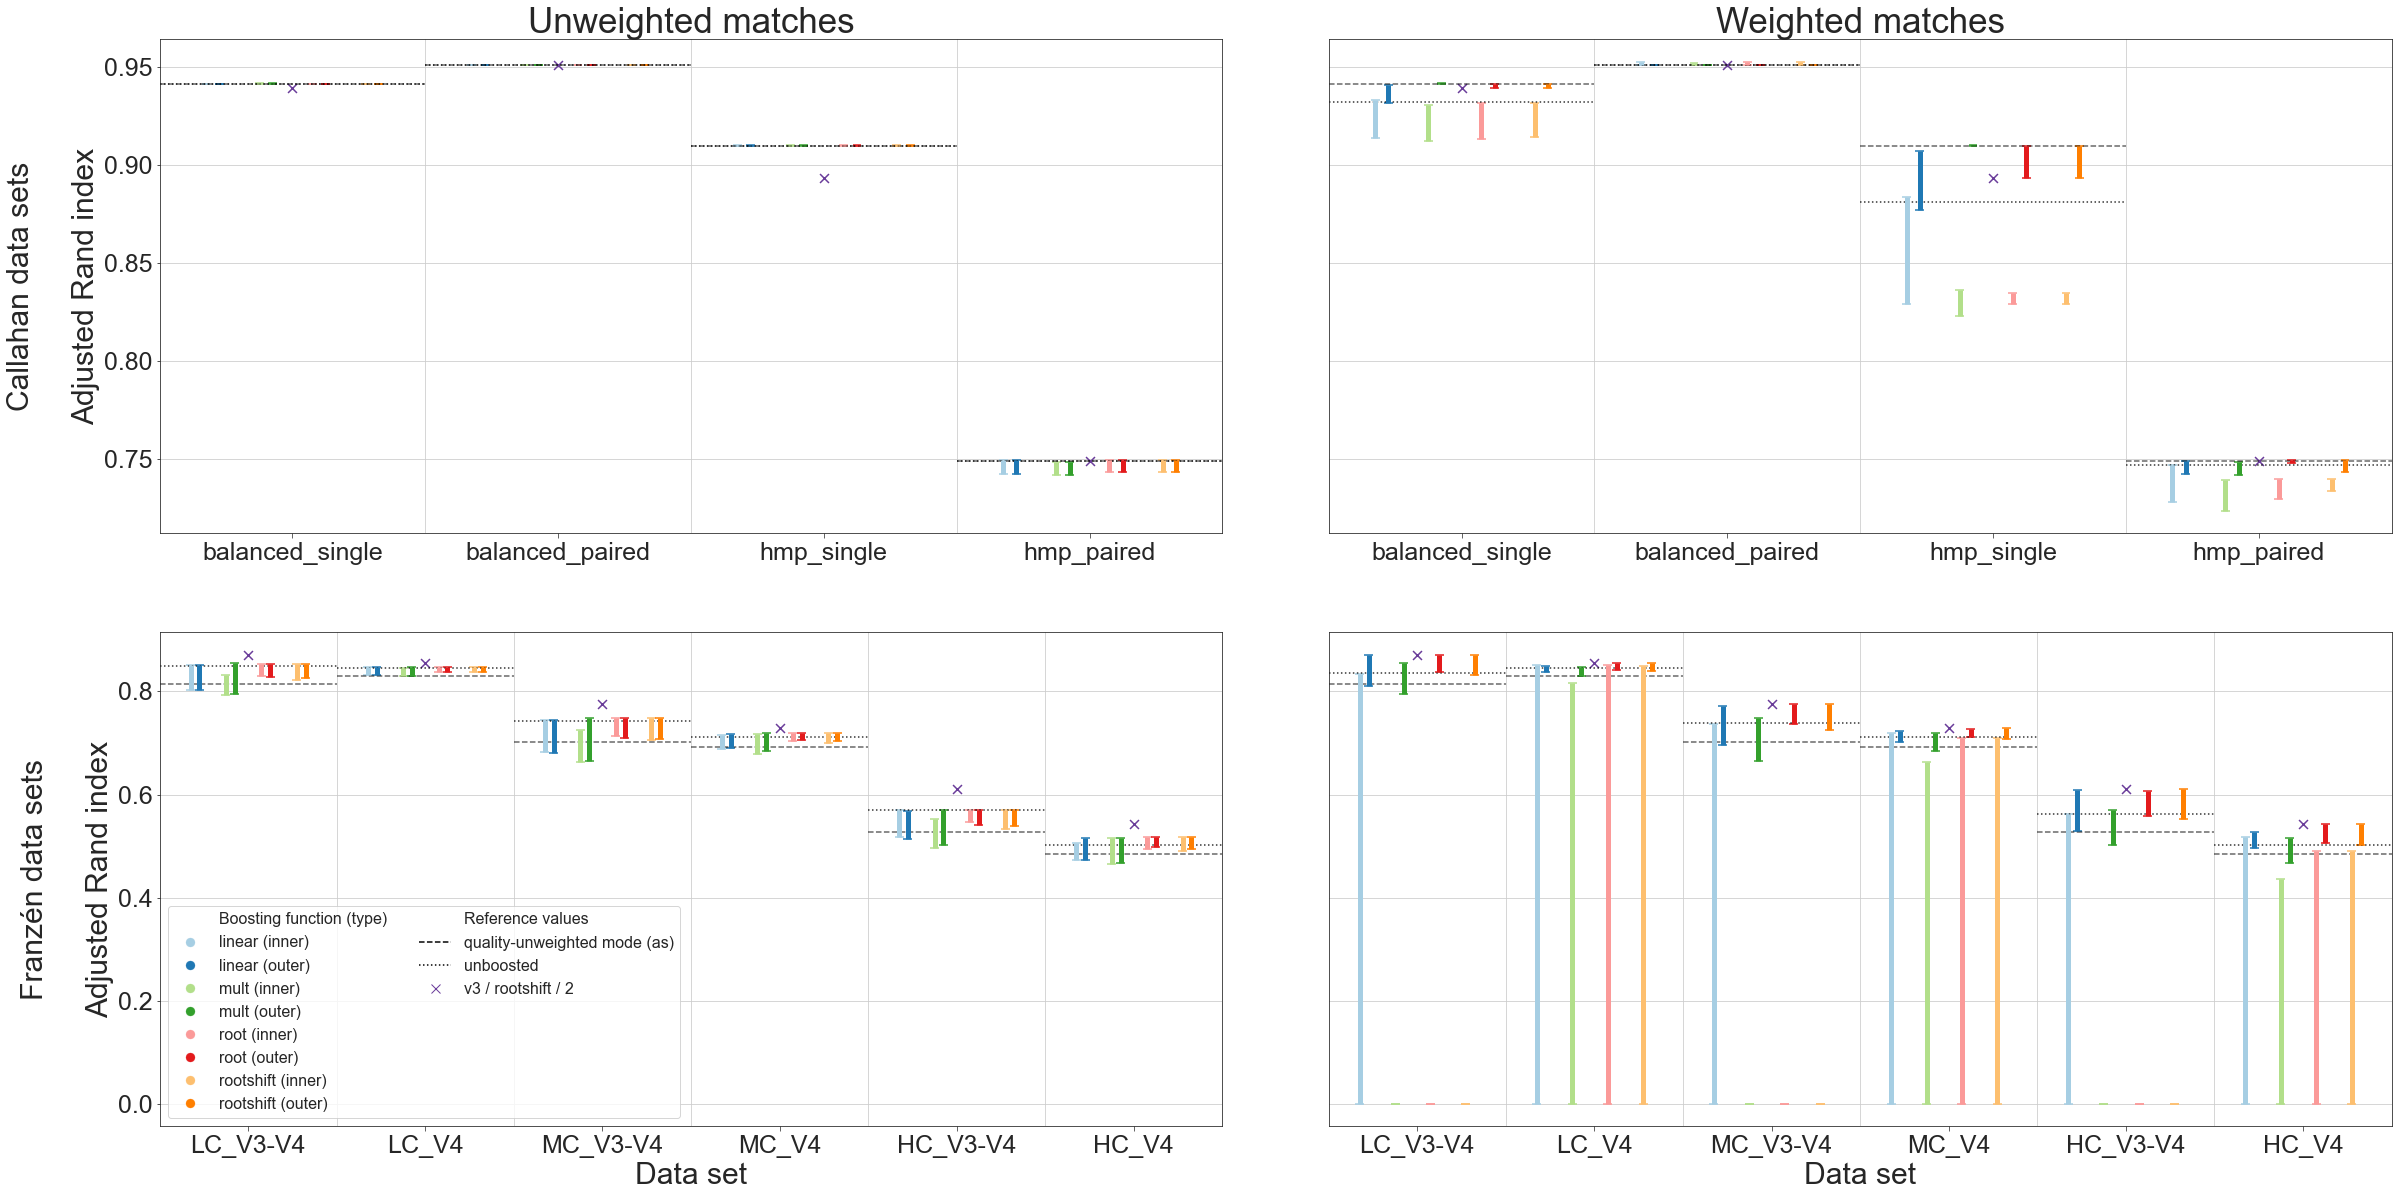

In [30]:
portions = [('Callahan data sets', df_callahan_gefast_joined_max_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_max_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'adjrandindex'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

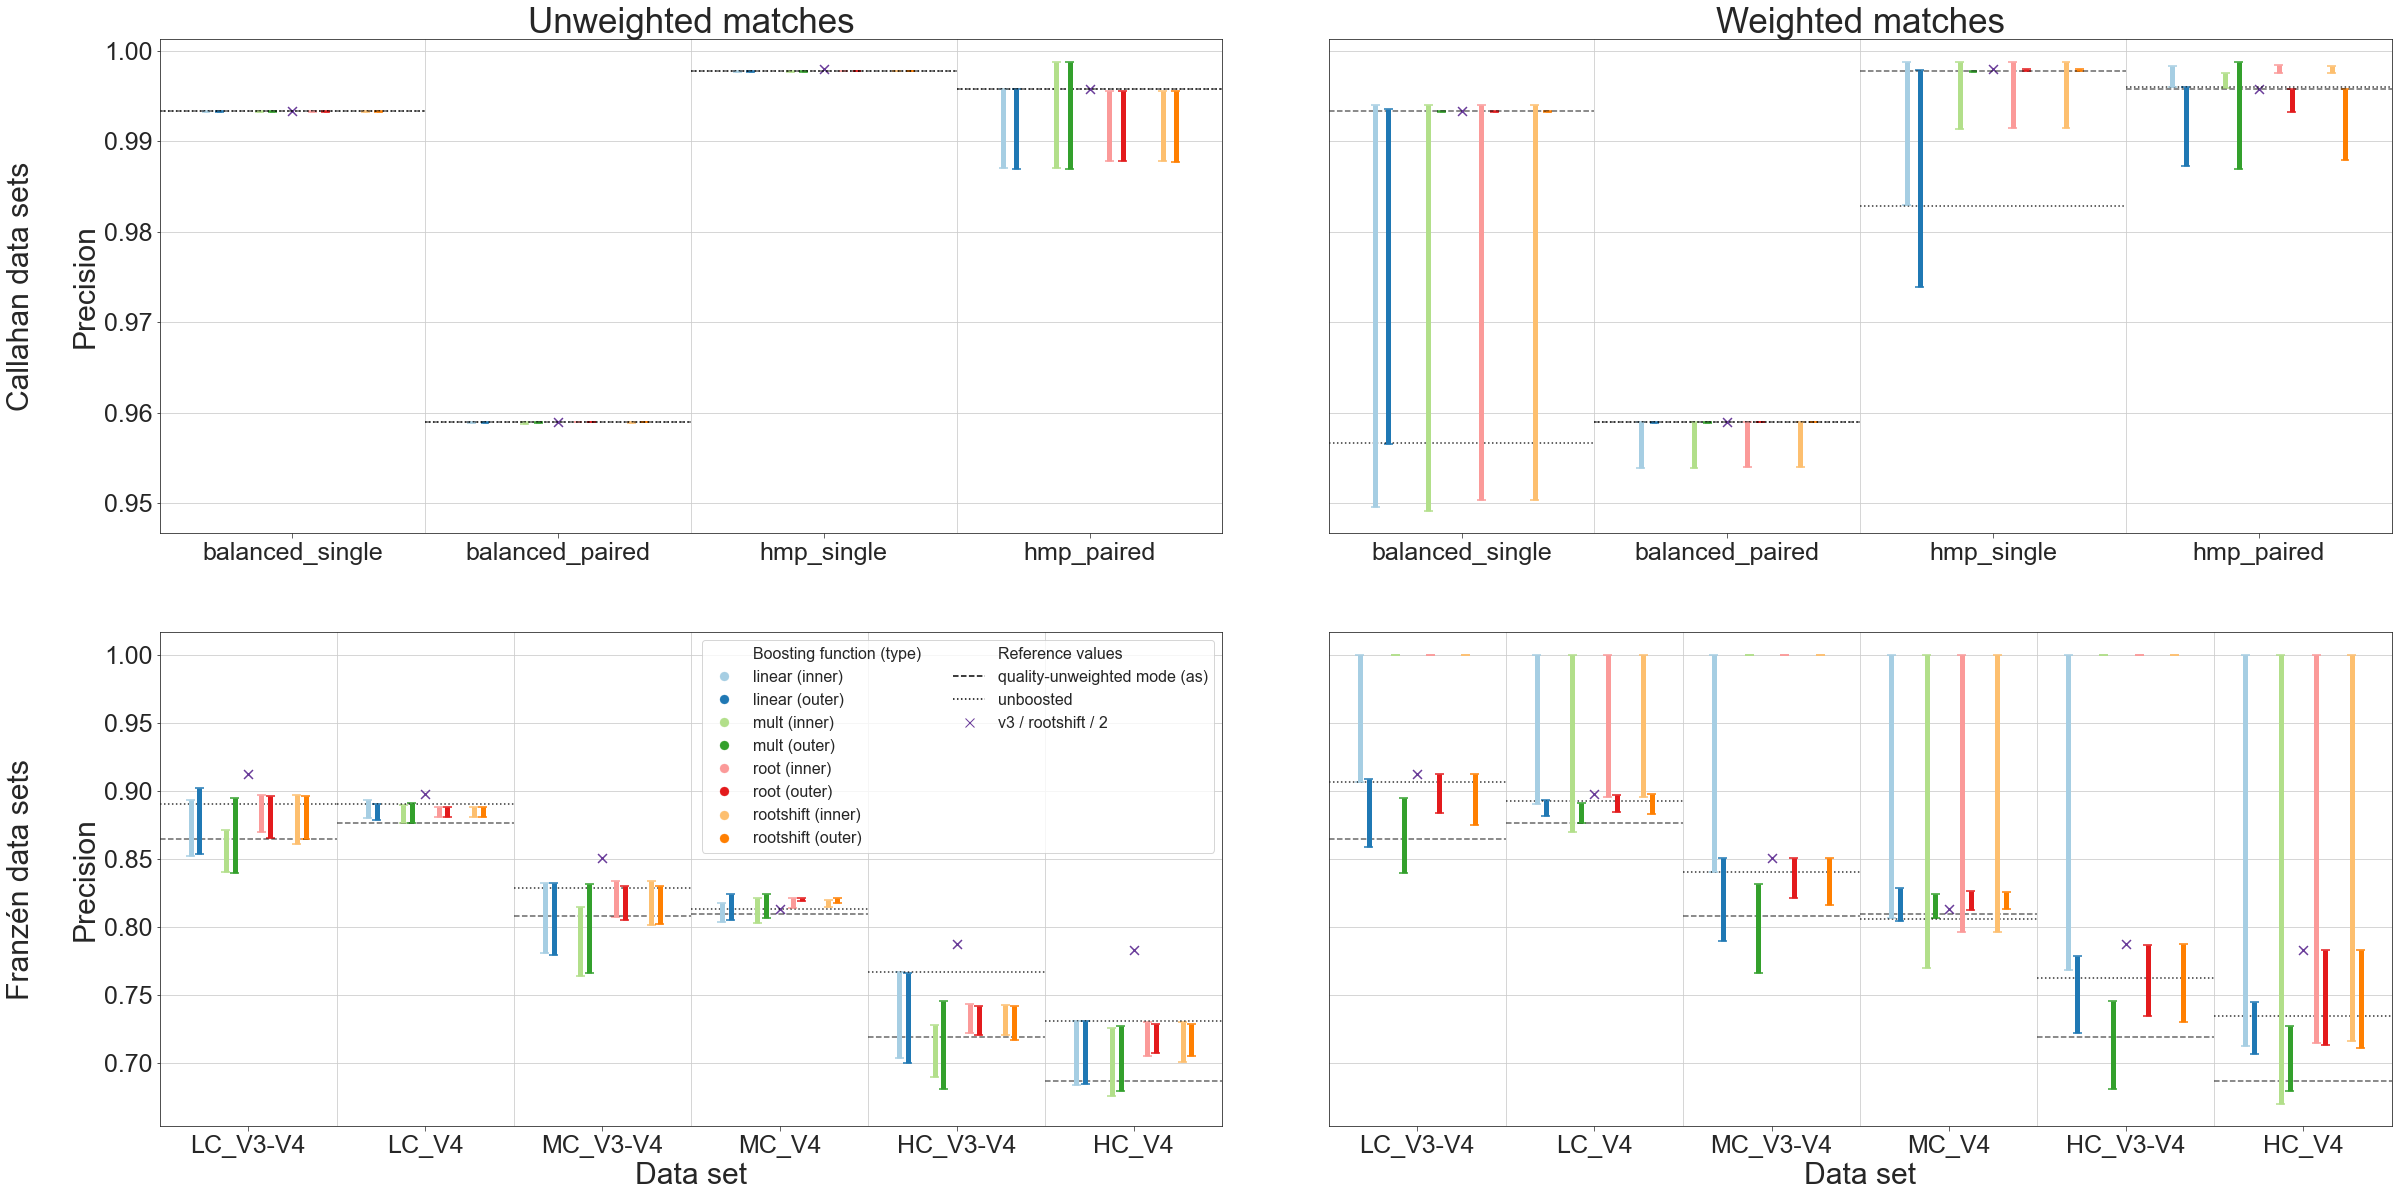

In [31]:
portions = [('Callahan data sets', df_callahan_gefast_joined_max_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_max_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'precision'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

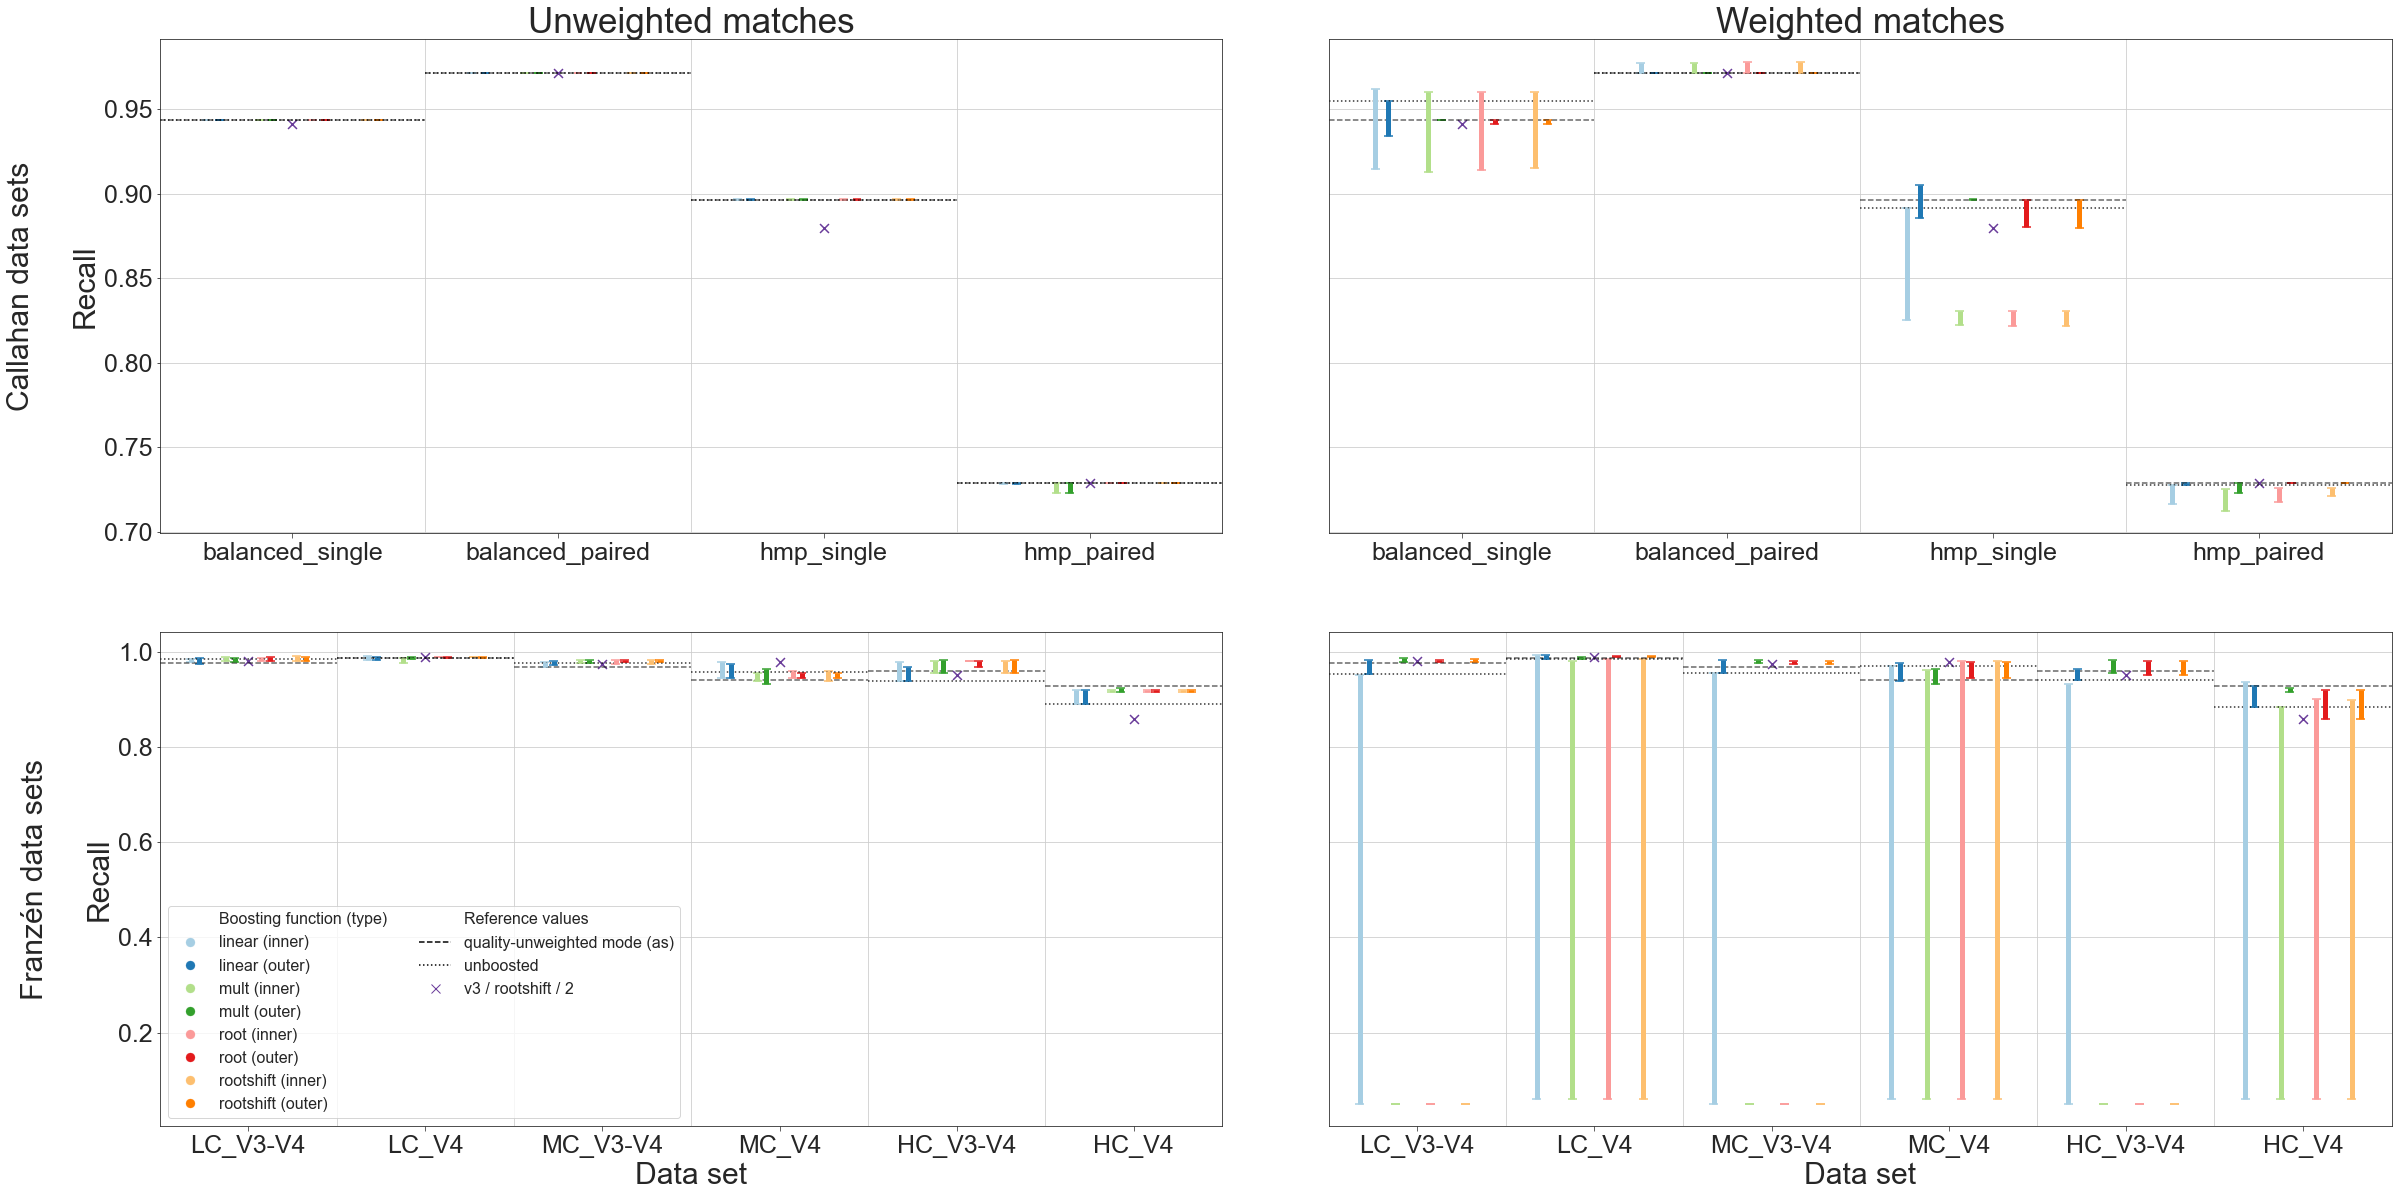

In [32]:
portions = [('Callahan data sets', df_callahan_gefast_joined_max_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_max_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'recall'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

Improvements were possible with both unweighted and weighted matches (on Franzén data).   
Weighted matches with outer boosting showed the largest potential for increases.   
Unboosted variants were also strong on Franzén data.   
All boosting functions could achieve large improvements in terms of precision on the Franzén data sets, apparently connected to even larger decreases in recall.   
On Callahan, small improvements possible but variants have more potential to lower precision and recall.

-- *Average clustering quality*

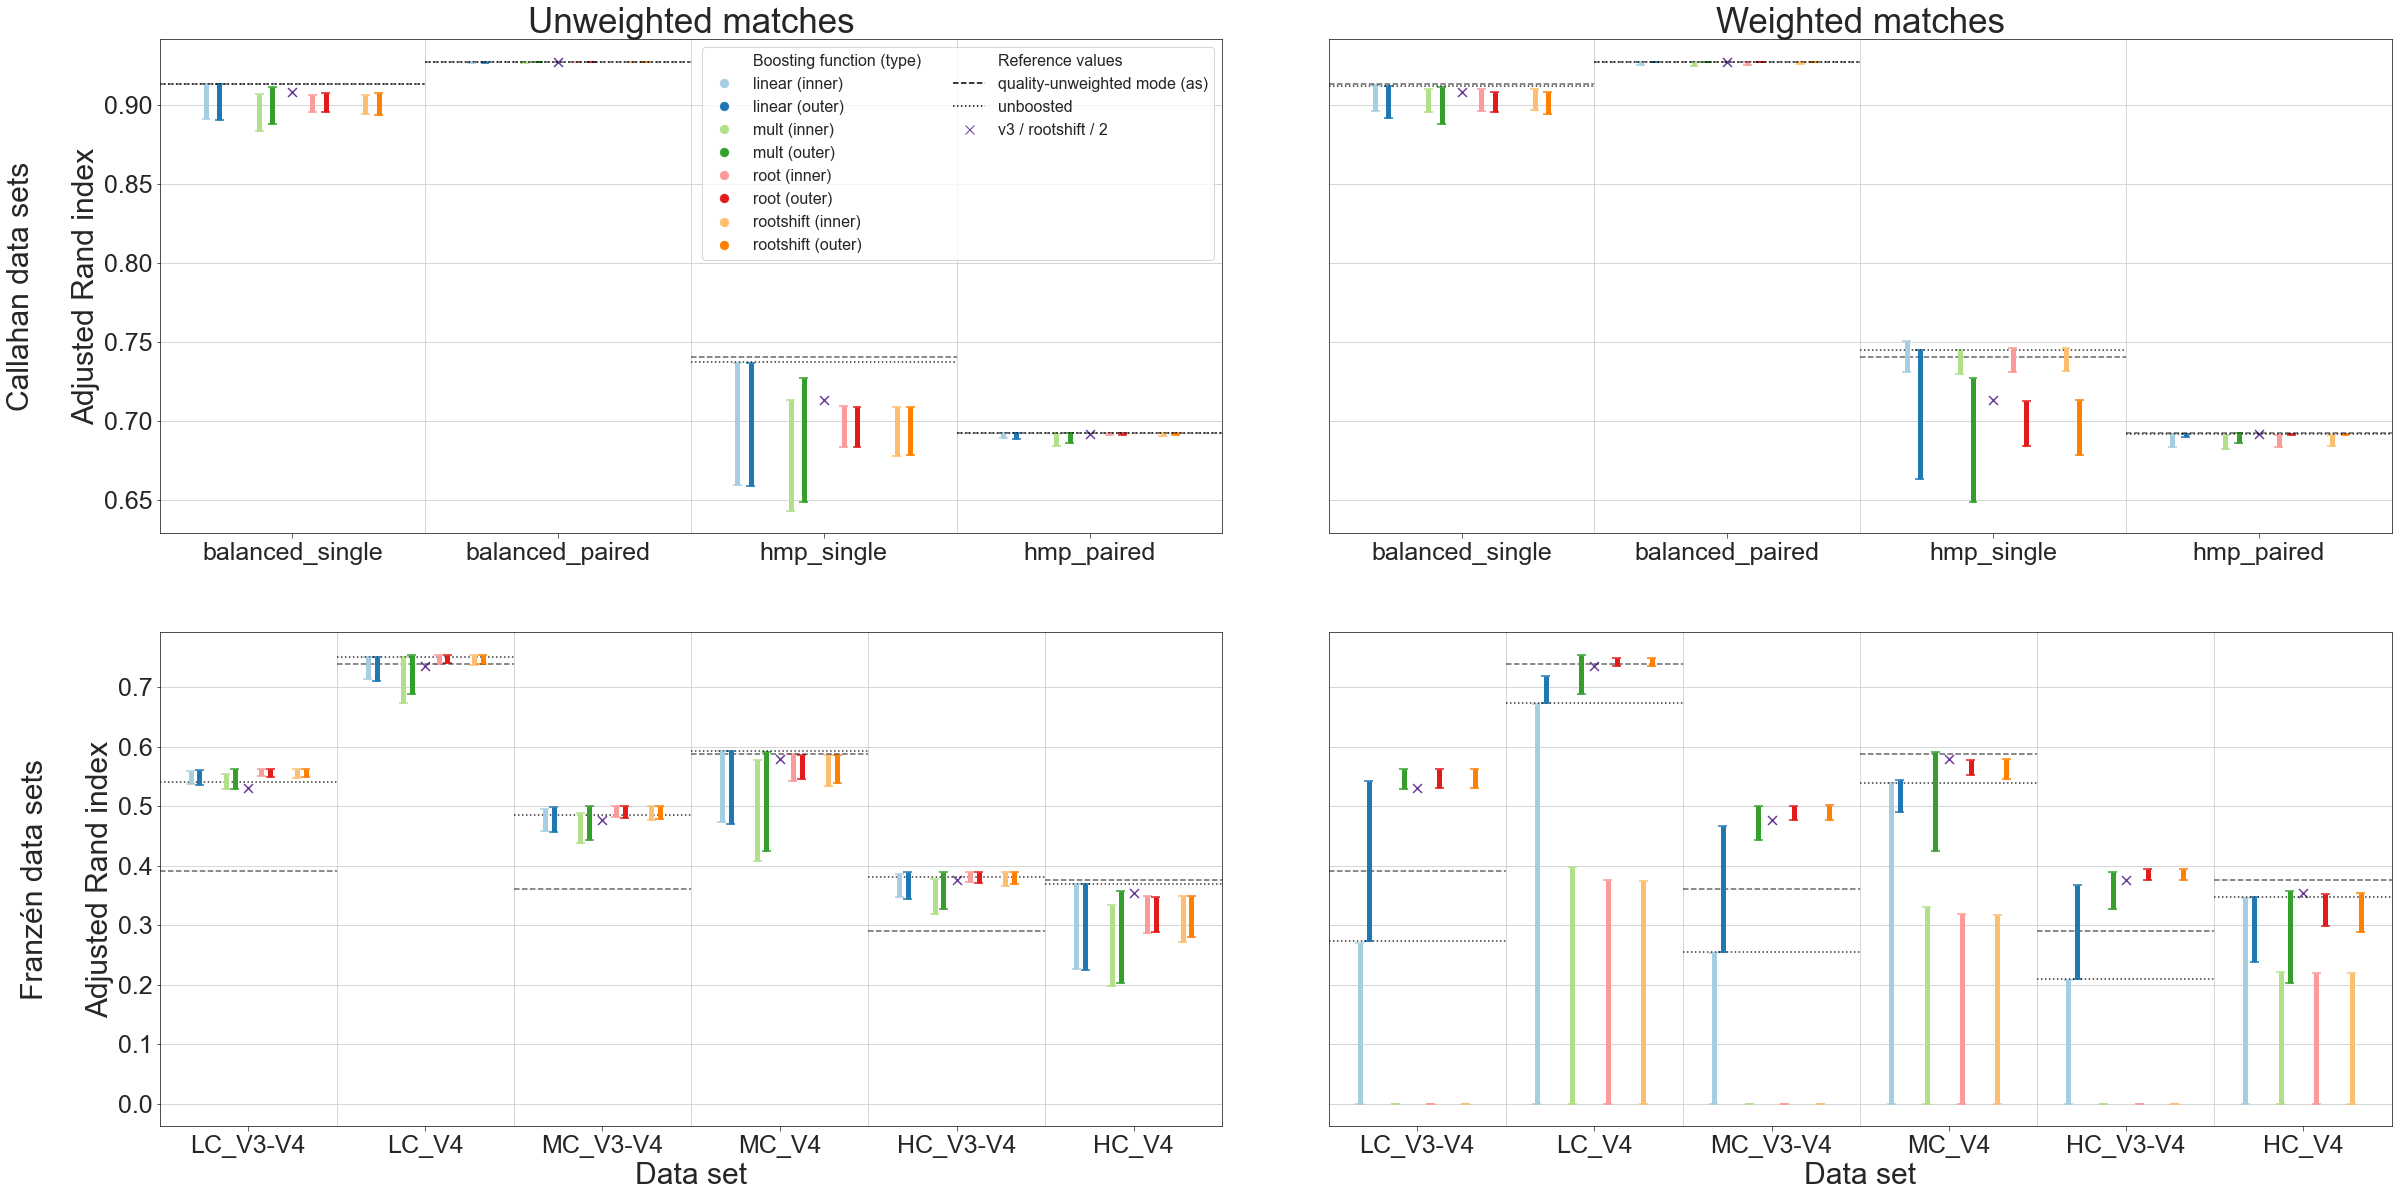

In [33]:
portions = [('Callahan data sets', df_callahan_gefast_joined_mean_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_mean_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'adjrandindex'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp), leg_positions = [(0, 0, 'best')])

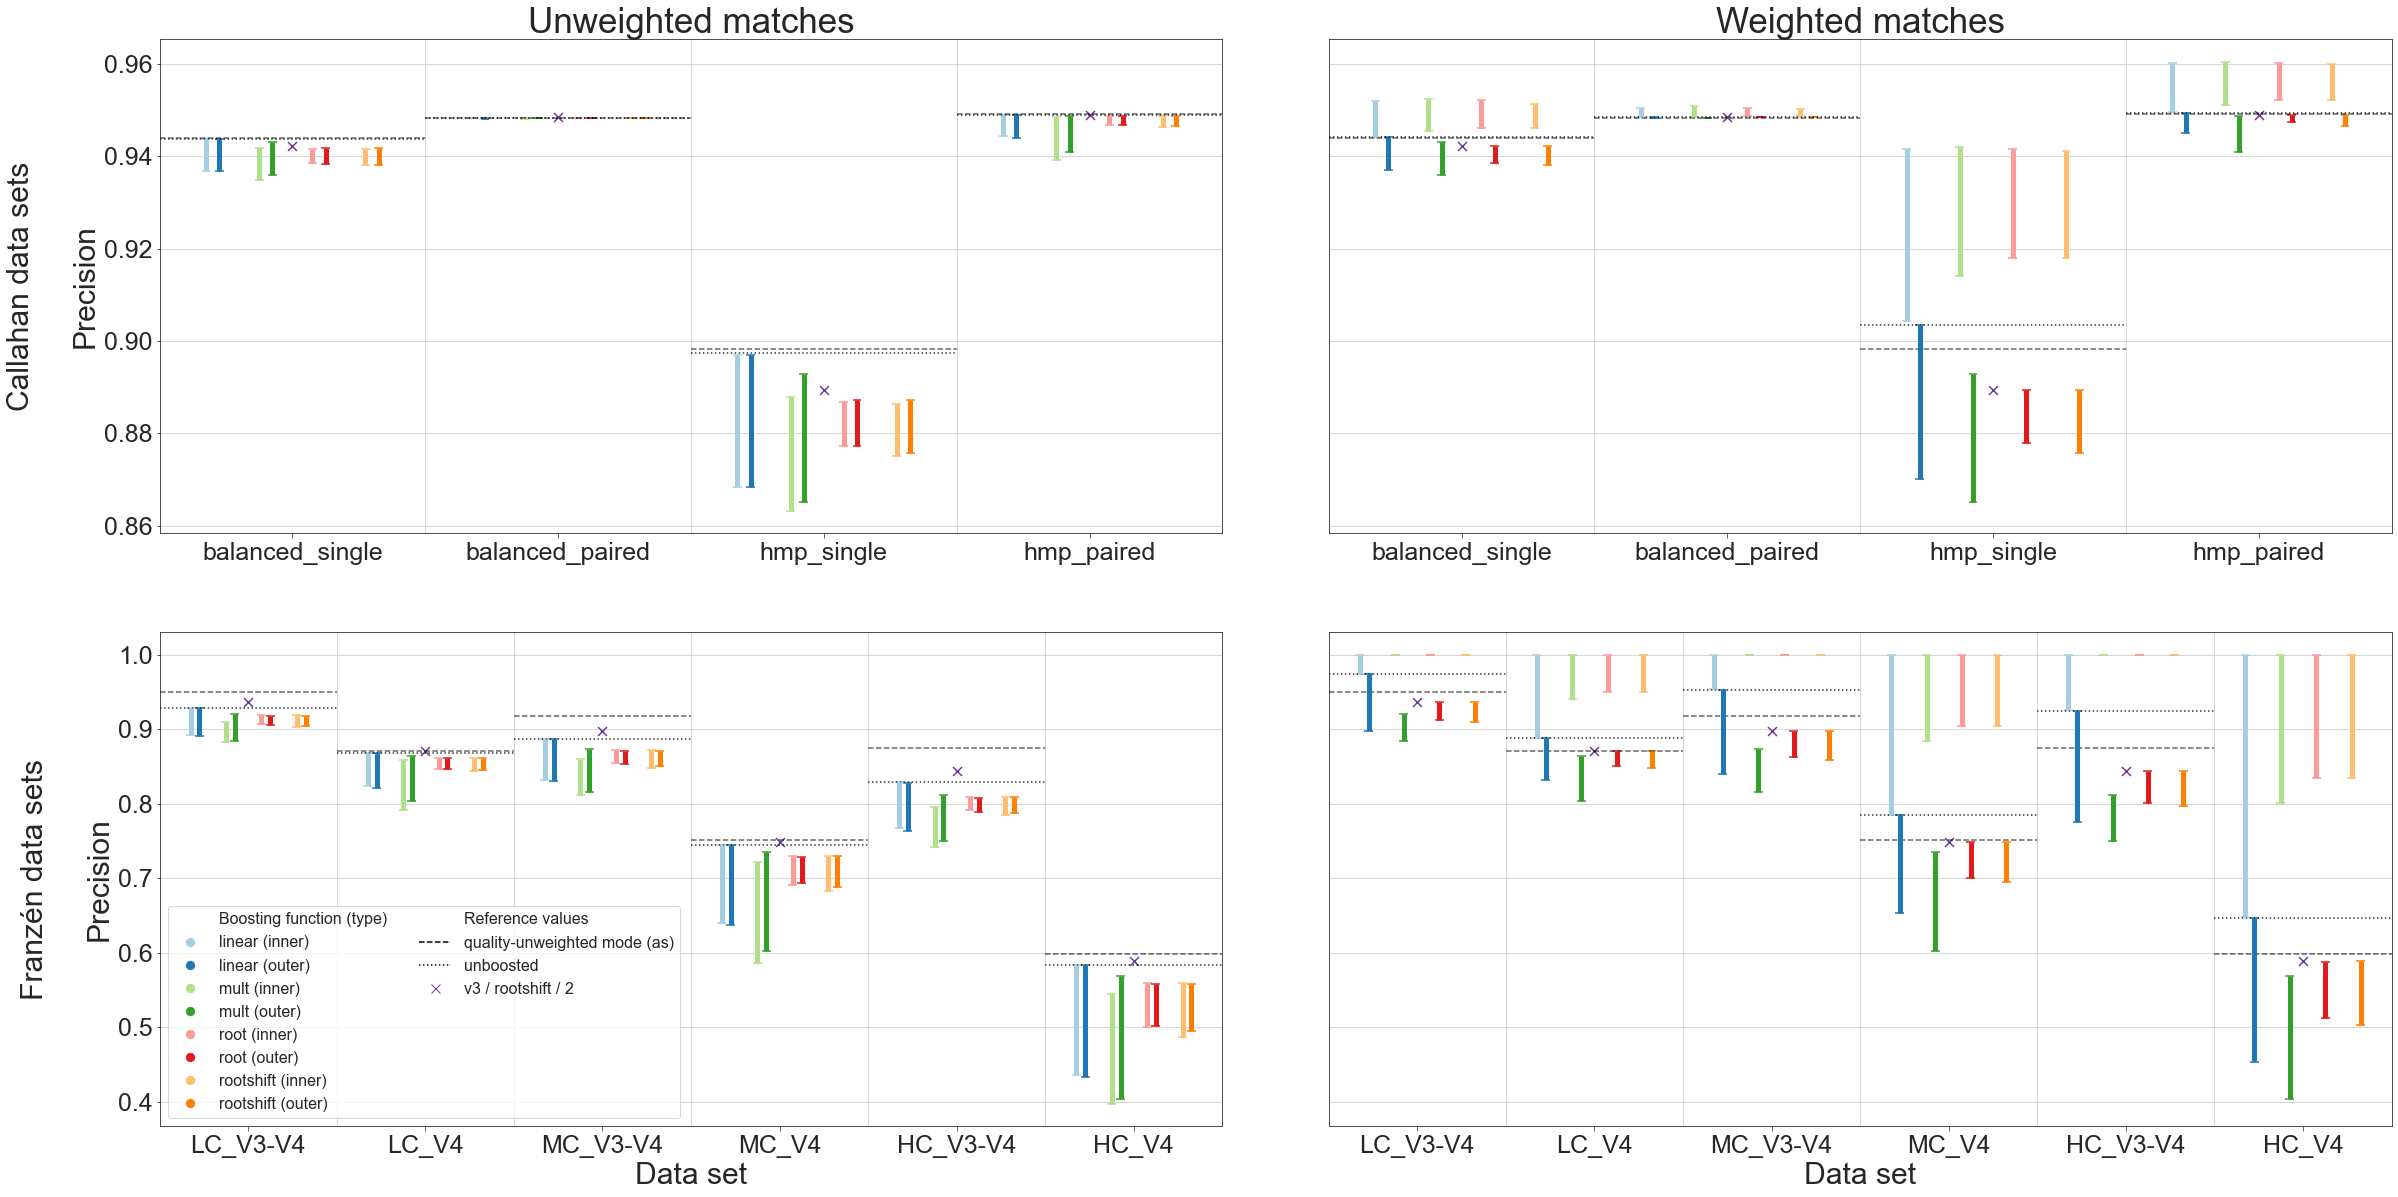

In [34]:
portions = [('Callahan data sets', df_callahan_gefast_joined_mean_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_mean_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'precision'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

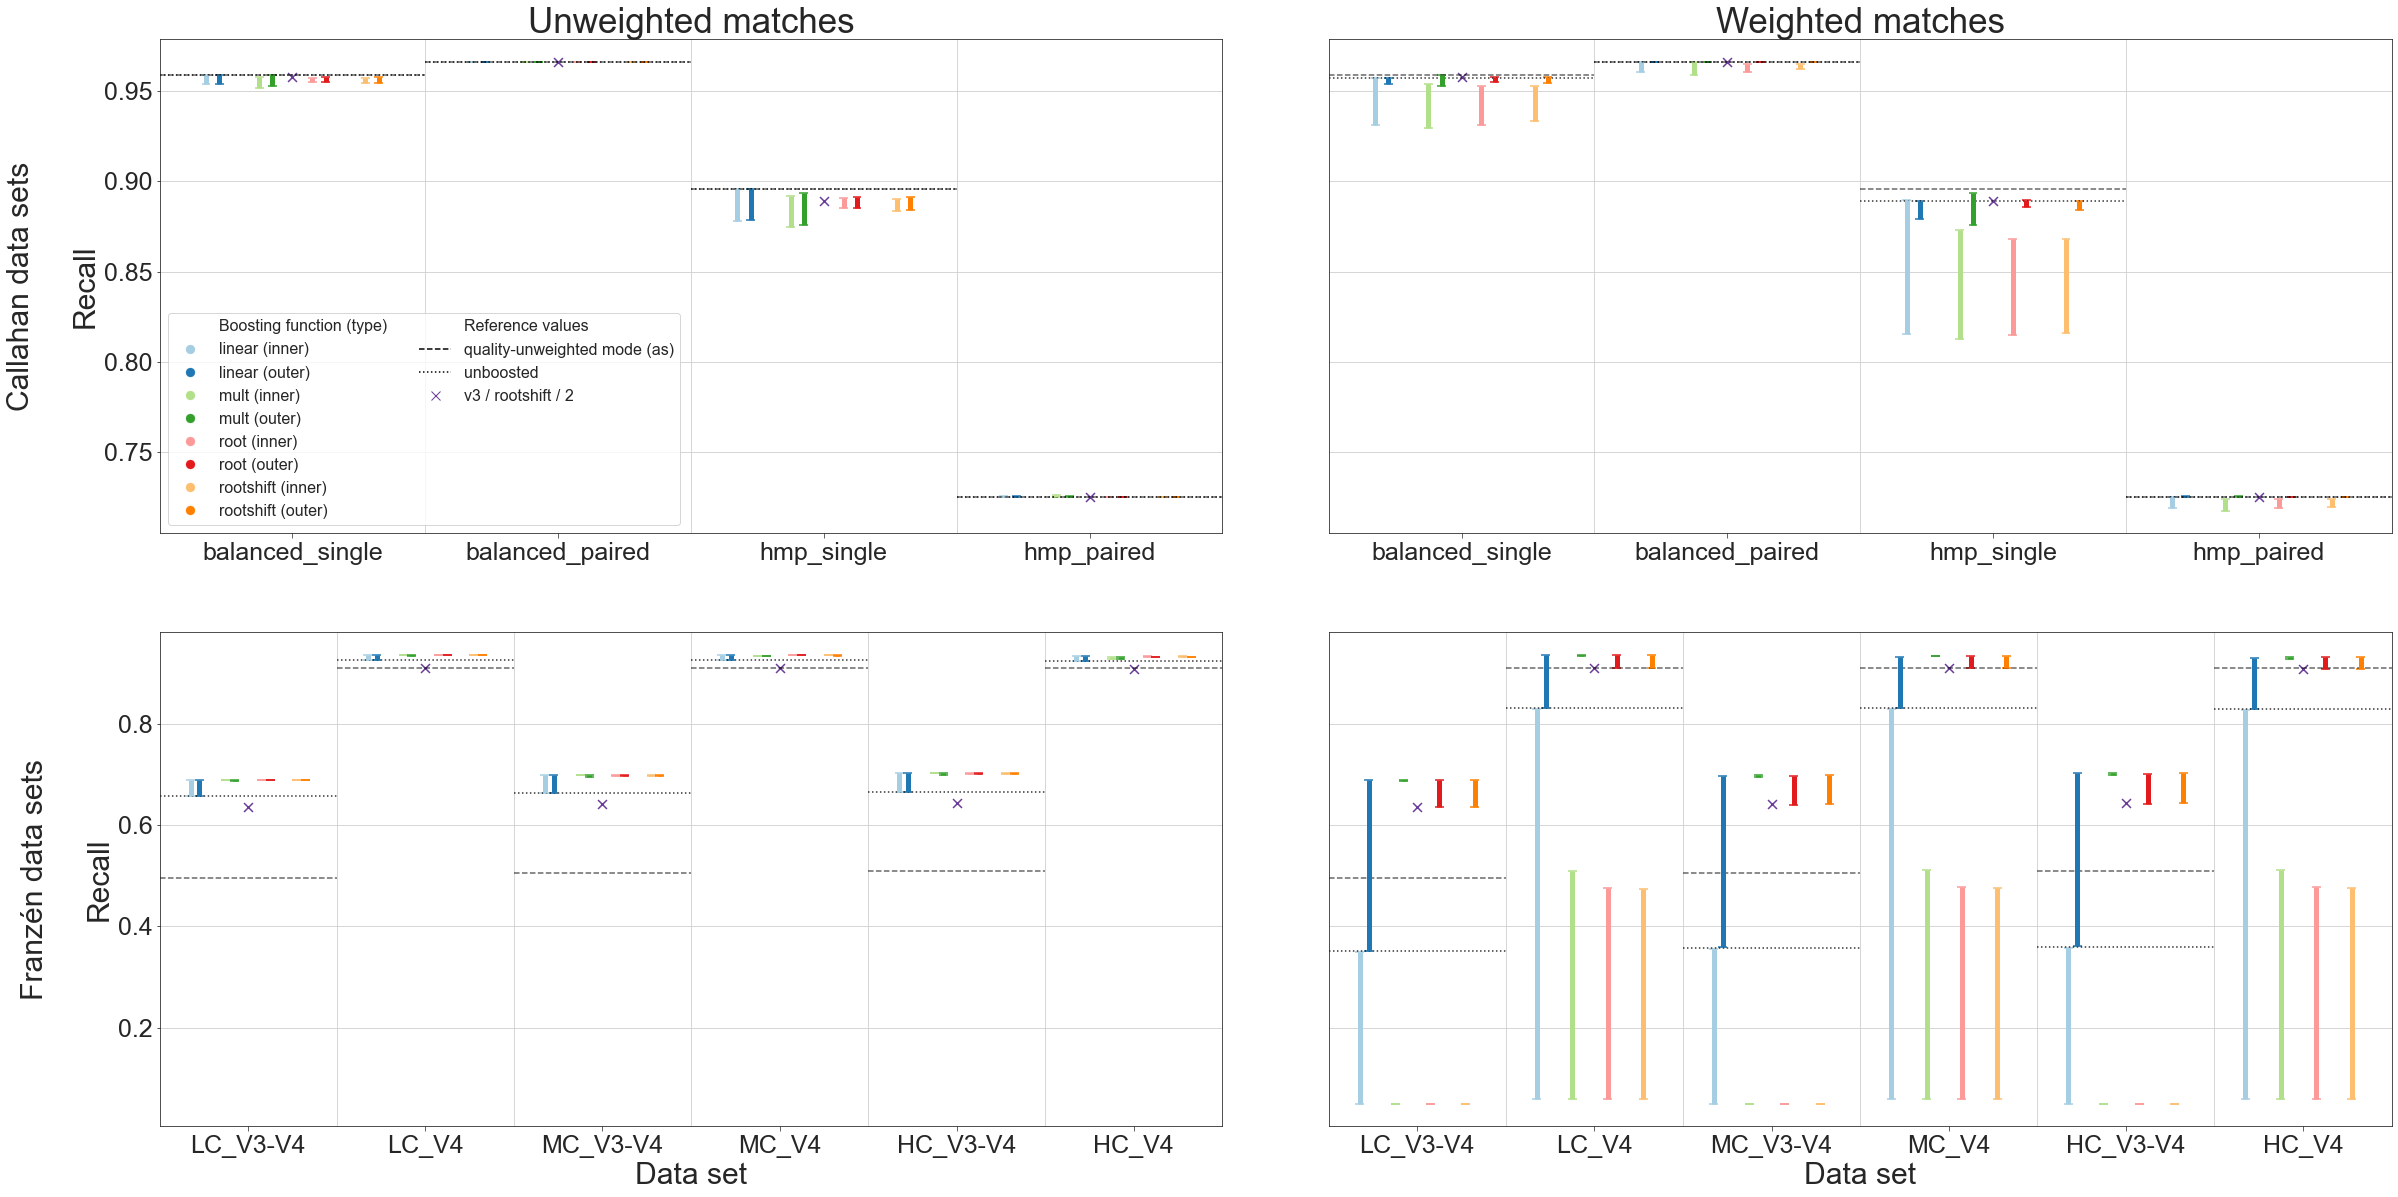

In [35]:
portions = [('Callahan data sets', df_callahan_gefast_joined_mean_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_mean_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'recall'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp), leg_positions = [(0, 0, 'best')])

ARI improvements usually only on V3-V4 data.   
Again large possible precision-recall trade-offs.

-- *N-best average clustering quality*

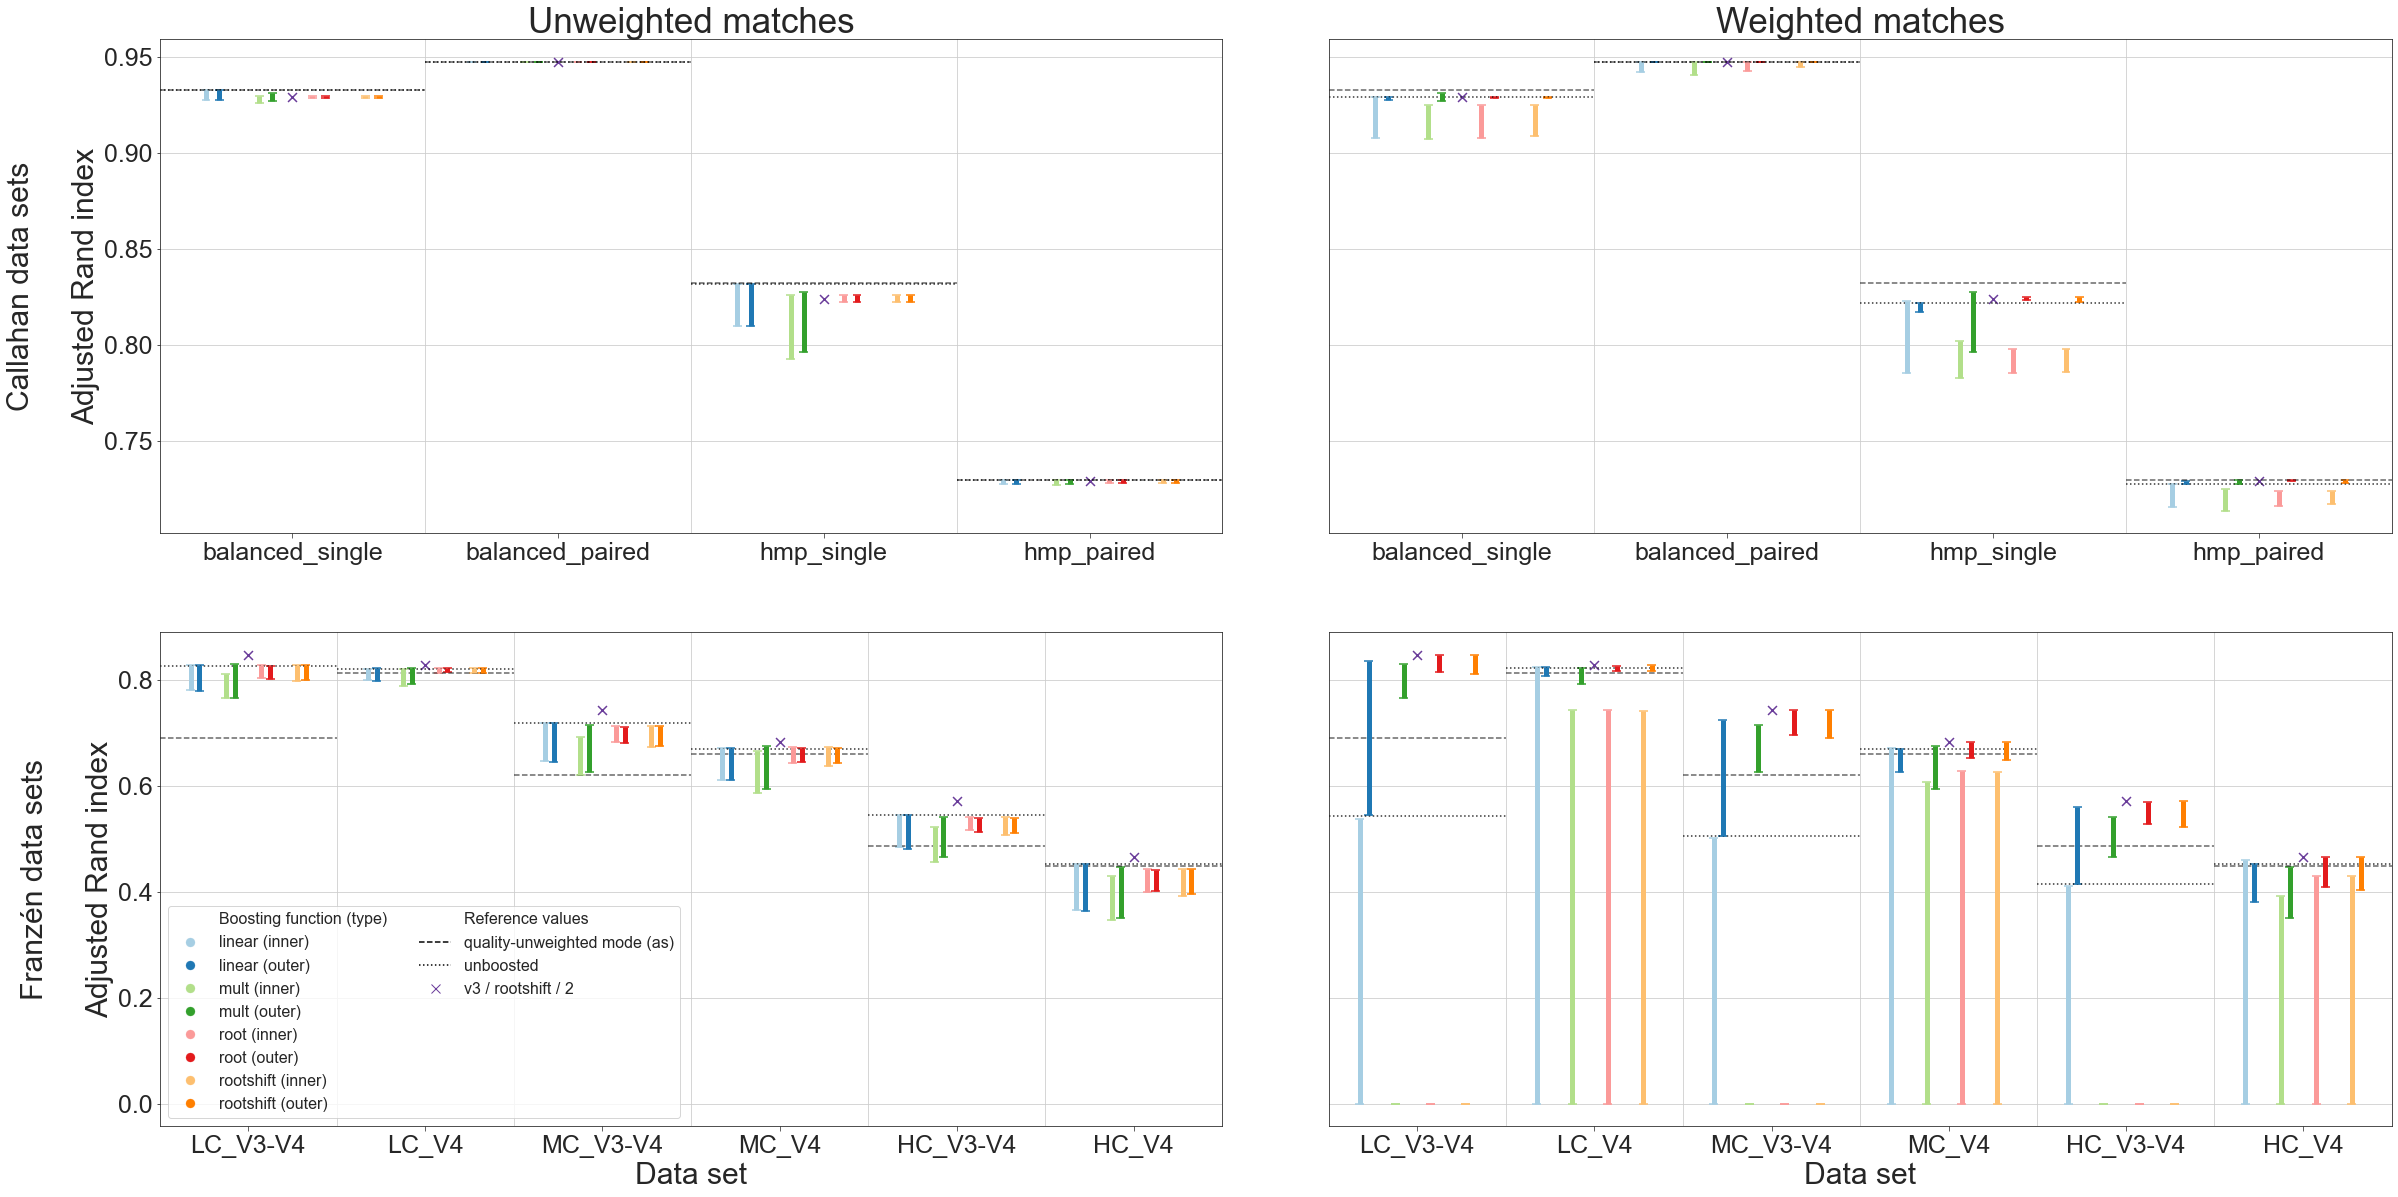

In [36]:
portions = [('Callahan data sets', df_callahan_gefast_joined_nbest_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'adjrandindex'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

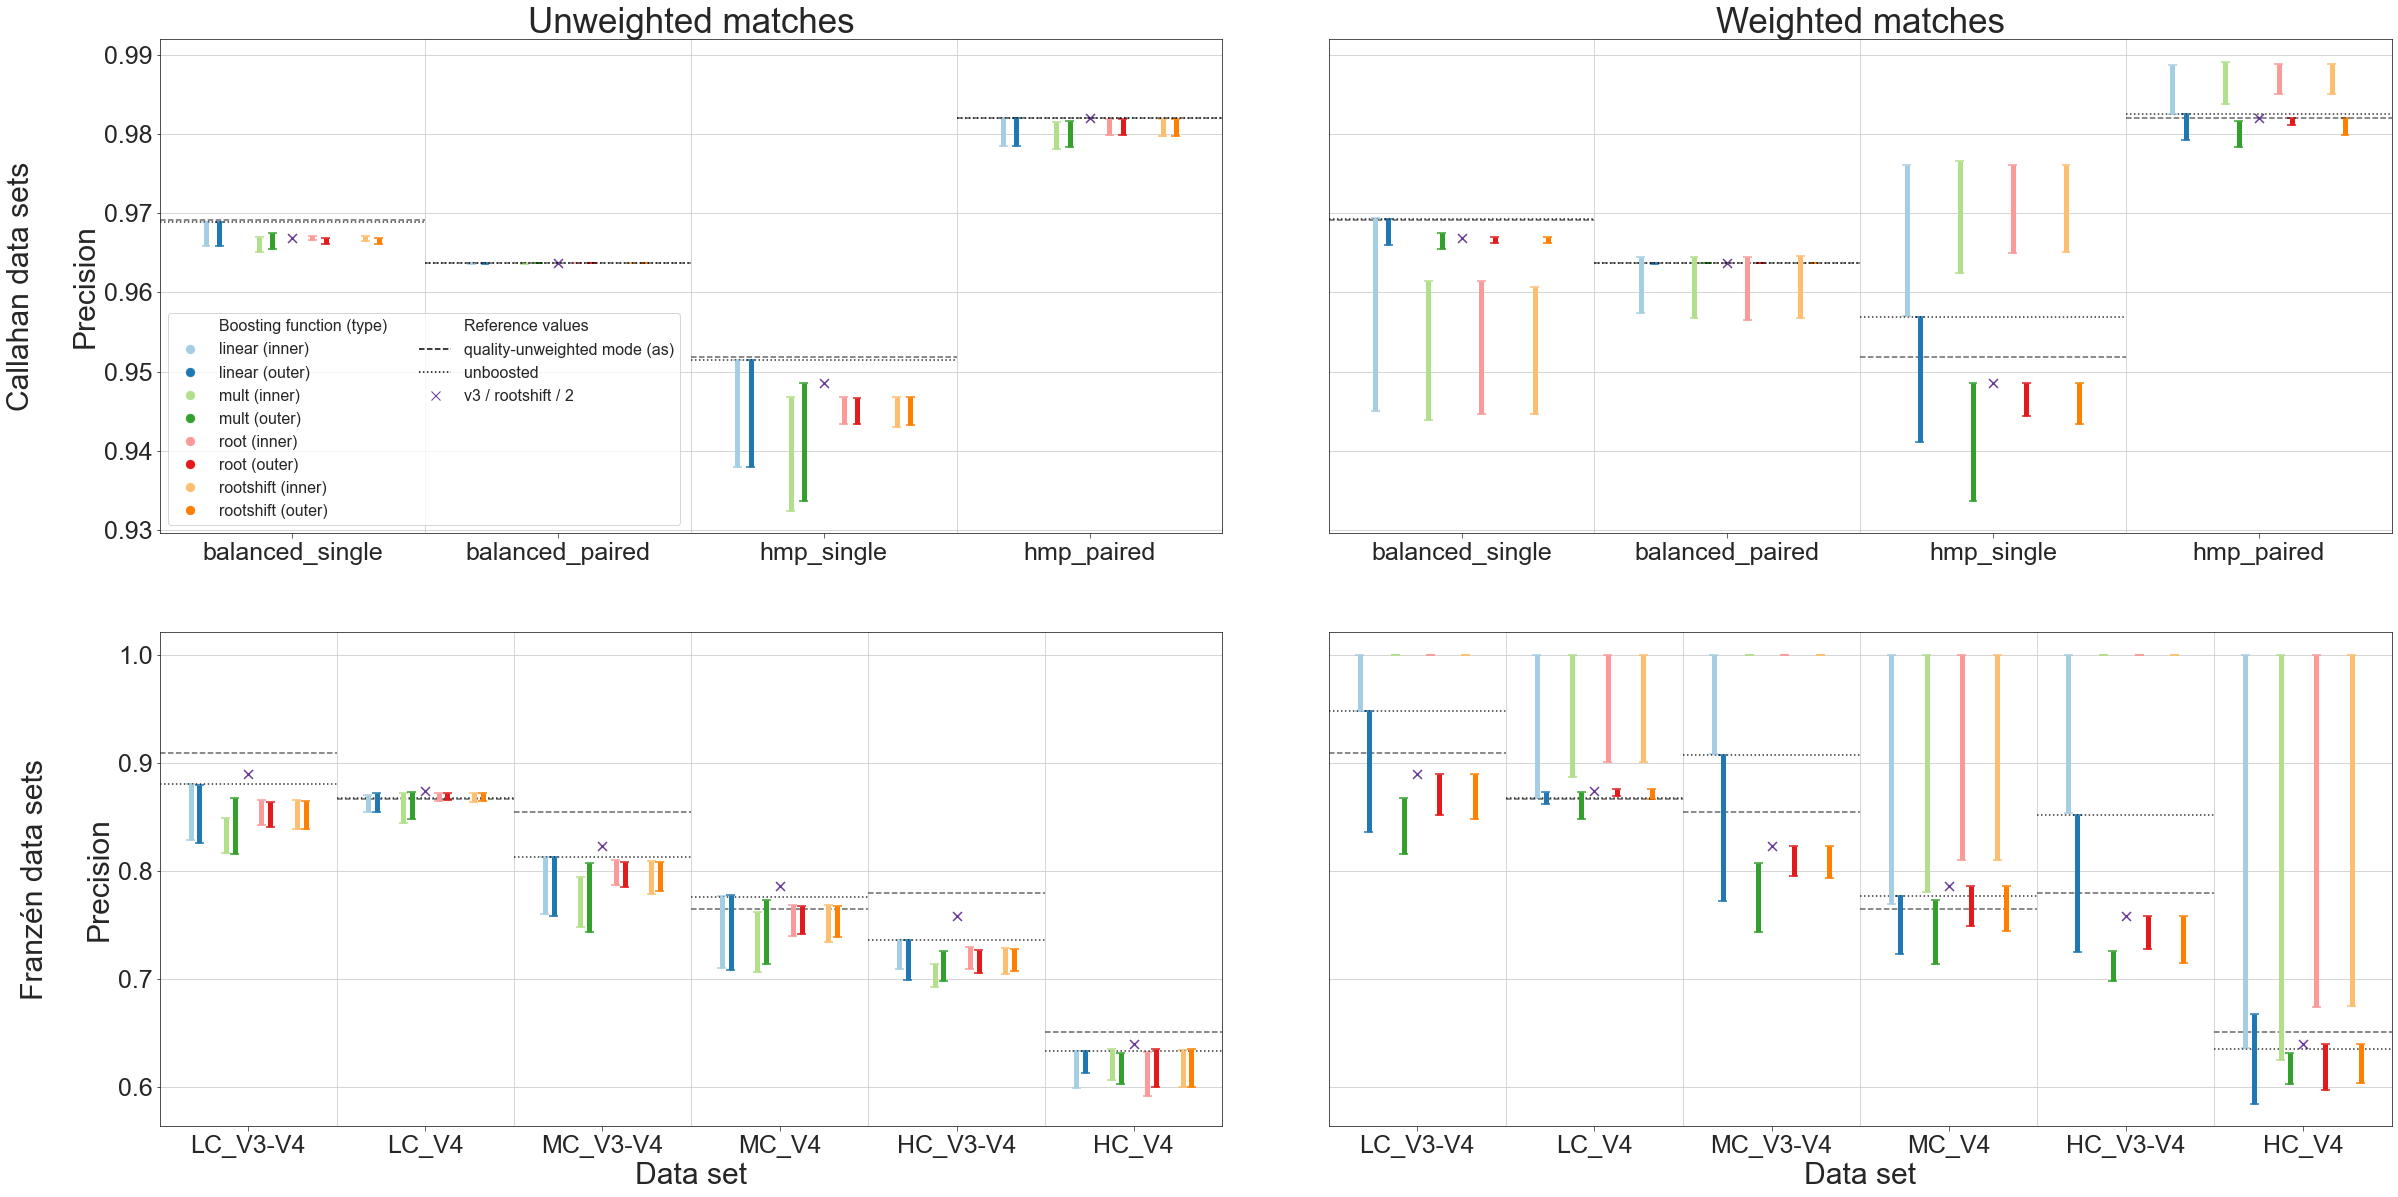

In [37]:
portions = [('Callahan data sets', df_callahan_gefast_joined_nbest_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'precision'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp), leg_positions = [(0, 0, 'best')])

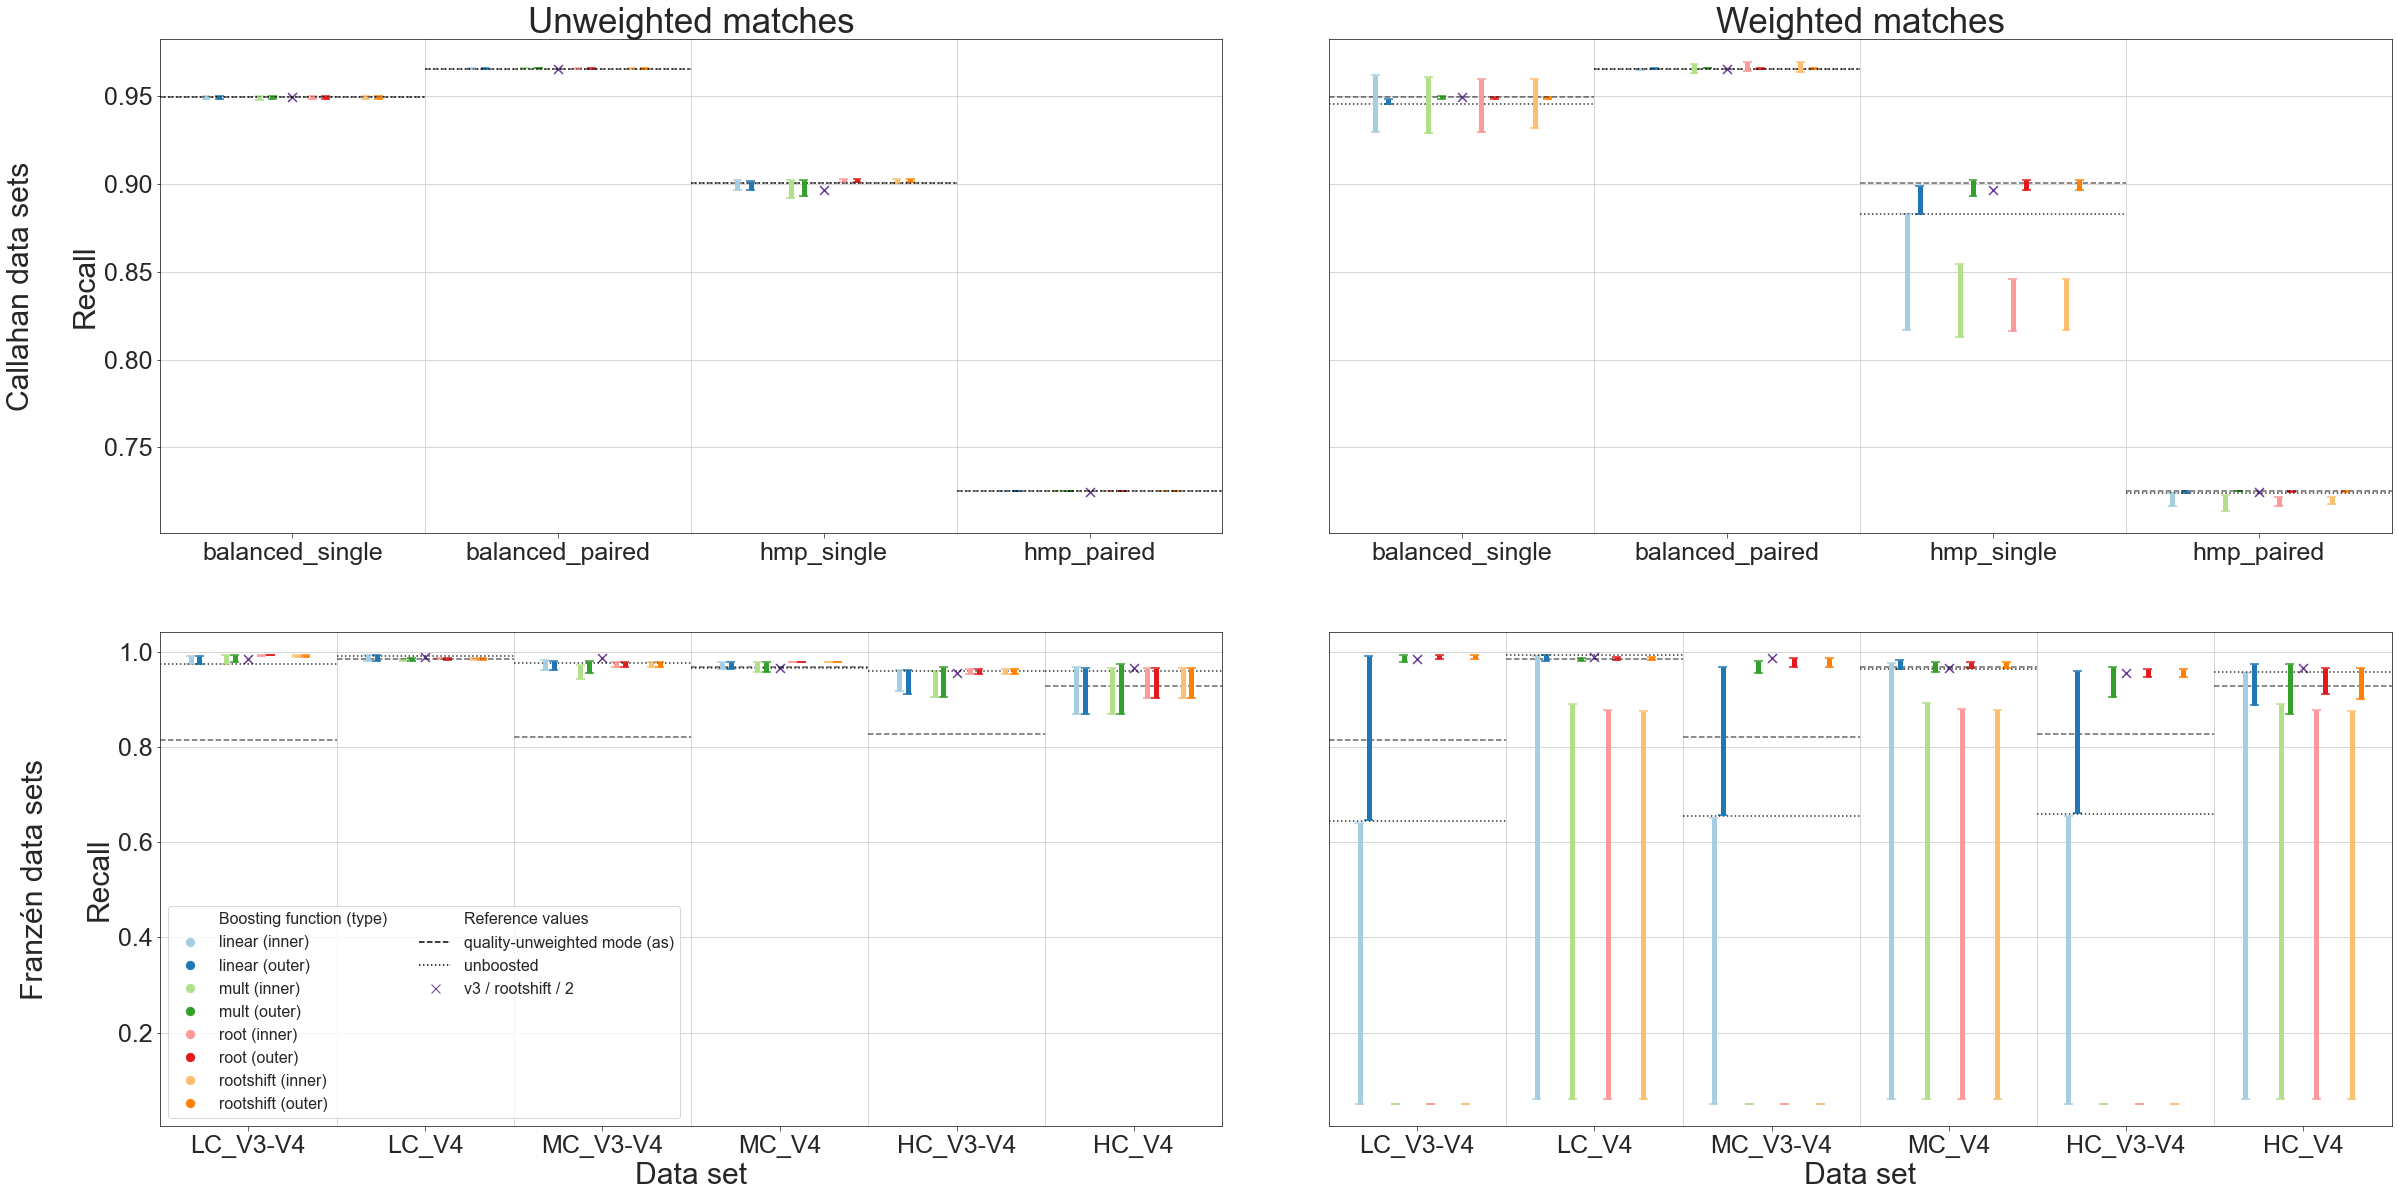

In [38]:
portions = [('Callahan data sets', df_callahan_gefast_joined_nbest_avg, ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
            ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])]
modes = (mode, qmode)
metric = 'recall'
overview_plot(portions, modes, metric, qw_option, (best_v, best_b, best_bp))

Similar tendencies as average.

### Comparison with other tools

Compares the clustering quality of the quality-unweighted mode, the best unboosted and boosted variant with USEARCH, VSEARCH, UPARSE and Swarm.

In [39]:
def avg_diff_multiple_others(portions, ref, cmps, metric = 'adjrandindex'):
    
    ref_tool, ref_mode = ref
    
    df_columns = ['data_group'] + ['%s / %s / %s / %s / %s' % (m, v, q, b, bp) for m, v, q, b, bp in cmps]
    
    rows = []
    for ref_df, df, data_set_groups, gt in portions:
        for (name, dsg) in data_set_groups:            
            if ref_tool == 'swarm':
                ref_grp = ref_df.loc[(ref_df['data_set'].isin(dsg)) & (ref_df['gt'] == gt) & (ref_df['tool'] == ref_tool) & (ref_df['refinement'] == ref_mode)]
            else:
                ref_grp = ref_df.loc[(ref_df['data_set'].isin(dsg)) & (ref_df['gt'] == gt) & (ref_df['tool'] == ref_tool) & (ref_df['mode'] == ref_mode)]
            
            row = [name]
            for mode, v, qw, b, bp in cmps:
                cmp_grp = df.loc[df['data_set'].isin(dsg) & (df['gt'] == gt) & (df['mode'] == mode) & (df['v_opt'] == v) & (df['qw_opt'] == qw) & (df['b_opt'] == b) & (df['b_param'] == bp)]
                
                row.append(cmp_grp[metric].mean() - ref_grp[metric].mean())
            
            rows.append(row)
            
    return pd.DataFrame(rows, columns = df_columns)

**USEARCH**

-- *Maximum clustering quality*

In [40]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_max_avg, df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                            (df_callahan_uvsearch_joined_max_avg, df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                           ('usearch', 'fast_size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.064190,-0.024566,0.007368
1,V4,-0.023718,-0.006891,0.016530
2,paired,-0.094289,-0.094282,-0.094300
3,single,-0.036916,-0.036916,-0.046281


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.056674,-0.025536,-0.003721
1,V4,-0.042260,-0.021699,-0.001754
2,paired,-0.002890,-0.002892,-0.002886
3,single,0.020997,0.020997,0.021151


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.052765,0.050638,0.053262
1,V4,0.043966,0.037012,0.034205
2,paired,-0.099254,-0.099253,-0.099259
3,single,-0.049375,-0.049375,-0.058726


-- *Average clustering quality*

In [41]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_mean_avg, df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_mean_avg, df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('usearch', 'fast_size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.186784,-0.066126,-0.073615
1,V4,0.052288,0.056343,0.041624
2,paired,-0.019669,-0.019687,-0.019744
3,single,-0.008128,-0.009963,-0.024551


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.190128,0.157226,0.168546
1,V4,0.137068,0.128802,0.133163
2,paired,0.057505,0.057445,0.057427
3,single,0.018325,0.017797,0.013084


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.356208,-0.197438,-0.219715
1,V4,-0.053380,-0.038348,-0.054135
2,paired,-0.110191,-0.110190,-0.110211
3,single,-0.023721,-0.023740,-0.027687


-- *N-best average clustering quality*

In [42]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_nbest_avg, df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_nbest_avg, df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('usearch', 'fast_size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.057930,0.040156,0.064352
1,V4,0.027684,0.034972,0.045701
2,paired,-0.075048,-0.075047,-0.075232
3,single,-0.036216,-0.036586,-0.042121


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.067788,0.030144,0.043776
1,V4,0.038201,0.036352,0.044373
2,paired,0.021963,0.021956,0.021941
3,single,0.000709,0.000450,-0.002056


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.101097,0.048125,0.054261
1,V4,0.007824,0.019941,0.021180
2,paired,-0.107197,-0.107196,-0.107290
3,single,-0.023558,-0.023539,-0.025522


On Franzén data, the maximum quality of the boosted variant was slightly higher, but not as robust (at least on V3-V4), while USEARCH was better in both respects on Callahan data.

**VSEARCH**

-- *Maximum clustering quality*

In [43]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_max_avg, df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_max_avg, df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('vsearch', 'size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.083213,-0.043589,-0.011655
1,V4,-0.026403,-0.009576,0.013846
2,paired,-0.103465,-0.103458,-0.103475
3,single,-0.041363,-0.041363,-0.050727


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.066426,-0.035288,-0.013473
1,V4,-0.047916,-0.027355,-0.007410
2,paired,-0.003929,-0.003931,-0.003925
3,single,0.017938,0.017938,0.018092


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.031964,0.029836,0.032460
1,V4,0.048739,0.041785,0.038978
2,paired,-0.108350,-0.108349,-0.108355
3,single,-0.048321,-0.048321,-0.057671


-- *Average clustering quality*

In [44]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_mean_avg, df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_mean_avg, df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('vsearch', 'size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.196160,-0.075502,-0.082991
1,V4,0.052576,0.056631,0.041912
2,paired,-0.023934,-0.023952,-0.024009
3,single,-0.009641,-0.011476,-0.026063


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.188236,0.155335,0.166654
1,V4,0.139106,0.130840,0.135202
2,paired,0.057758,0.057697,0.057680
3,single,0.019458,0.018929,0.014217


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.369810,-0.211041,-0.233317
1,V4,-0.055834,-0.040802,-0.056590
2,paired,-0.113542,-0.113541,-0.113563
3,single,-0.025427,-0.025446,-0.029394


-- *N-best average clustering quality*

In [45]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_nbest_avg, df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_nbest_avg, df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('vsearch', 'size'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.072352,0.025735,0.049931
1,V4,0.022689,0.029977,0.040707
2,paired,-0.081592,-0.081592,-0.081777
3,single,-0.040588,-0.040959,-0.046493


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.057656,0.020012,0.033644
1,V4,0.033450,0.031600,0.039622
2,paired,0.021068,0.021061,0.021046
3,single,-0.000060,-0.000318,-0.002824


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.113437,0.035784,0.041920
1,V4,0.005524,0.017641,0.018879
2,paired,-0.113215,-0.113213,-0.113308
3,single,-0.025376,-0.025358,-0.027340


On V4 data, the boosted variant showed a higher maximum and average quality, while it was lower on V3-V4 data (except for the n-best average).
VSEARCH was also better in both respects on Callahan data.

**UPARSE**

-- *Maximum clustering quality*

In [46]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_max_avg, df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_max_avg, df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('uparse', 'otus'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.018002,0.057626,0.089560
1,V4,0.084774,0.101602,0.125023
2,paired,-0.015423,-0.015415,-0.015433
3,single,-0.049856,-0.049856,-0.059220


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.044074,0.075212,0.097027
1,V4,0.129476,0.150036,0.169981
2,paired,0.003366,0.003364,0.003370
3,single,0.018091,0.018091,0.018245


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.021246,-0.023374,-0.020749
1,V4,-0.044185,-0.051139,-0.053945
2,paired,-0.023790,-0.023788,-0.023795
3,single,-0.064570,-0.064570,-0.073921


-- *Average clustering quality*

In [47]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_mean_avg, df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_mean_avg, df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('uparse', 'otus'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.314932,-0.194274,-0.201762
1,V4,-0.017311,-0.013256,-0.027975
2,paired,-0.055849,-0.055868,-0.055924
3,single,-0.148406,-0.150241,-0.164828


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.161144,0.128242,0.139561
1,V4,0.078676,0.070409,0.074771
2,paired,-0.025278,-0.025339,-0.025357
3,single,-0.056385,-0.056913,-0.061625


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.486962,-0.328192,-0.350469
1,V4,-0.086894,-0.071862,-0.087650
2,paired,-0.028149,-0.028147,-0.028169
3,single,-0.056909,-0.056928,-0.060875


-- *N-best average clustering quality*

In [48]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_uvsearch_joined_nbest_avg, df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_uvsearch_joined_nbest_avg, df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('uparse', 'otus'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.063308,0.034778,0.058974
1,V4,0.057414,0.064703,0.075432
2,paired,-0.026957,-0.026957,-0.027142
3,single,-0.092923,-0.093293,-0.098828


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.094504,0.056860,0.070492
1,V4,0.099392,0.097543,0.105564
2,paired,-0.001048,-0.001056,-0.001071
3,single,-0.016959,-0.017218,-0.019724


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.169150,-0.019929,-0.013793
1,V4,-0.036207,-0.024090,-0.022852
2,paired,-0.028488,-0.028486,-0.028581
3,single,-0.059511,-0.059492,-0.061475


On Franzén data, the maximum and n-best average quality of the unboosted and boosted variant were higher, while UPARSE was better in both respects on Callahan data.

**Swarm**

-- *Maximum clustering quality*

In [49]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_swarm_joined_max_avg, df_franzen_gefast_joined_max_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_swarm_joined_max_avg, df_callahan_gefast_joined_max_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('swarm', 'nf'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.008341,0.047965,0.079899
1,V4,0.012328,0.029155,0.052577
2,paired,-0.004087,-0.004080,-0.004097
3,single,0.000000,0.000000,-0.009364


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.010018,0.021120,0.042935
1,V4,0.004849,0.025410,0.045355
2,paired,-0.006902,-0.006904,-0.006898
3,single,0.000000,0.000000,0.000154


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.024267,0.022139,0.024764
1,V4,0.008077,0.001123,-0.001683
2,paired,0.000704,0.000705,0.000699
3,single,0.000000,0.000000,-0.009350


-- *Average clustering quality*

In [50]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_swarm_joined_mean_avg, df_franzen_gefast_joined_mean_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_swarm_joined_mean_avg, df_callahan_gefast_joined_mean_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('swarm', 'nf'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.003268,0.123926,0.116437
1,V4,0.003620,0.007675,-0.007044
2,paired,-0.005732,-0.005750,-0.005807
3,single,-0.007959,-0.009794,-0.024381


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.000798,-0.033700,-0.022380
1,V4,0.004000,-0.004266,0.000096
2,paired,-0.001985,-0.002045,-0.002063
3,single,-0.002922,-0.003450,-0.008162


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.005958,0.164728,0.142451
1,V4,-0.000183,0.014849,-0.000939
2,paired,-0.001978,-0.001977,-0.001999
3,single,-0.001945,-0.001964,-0.005911


-- *N-best average clustering quality*

In [51]:
for m in ['adjrandindex', 'precision', 'recall']:
    print('%s:' % rename_map[m])
    display(avg_diff_multiple_others([(df_franzen_swarm_joined_nbest_avg, df_franzen_gefast_joined_nbest_avg, [('V3-V4', ['LC_V3-V4', 'MC_V3-V4', 'HC_V3-V4']), ('V4', ['LC_V4', 'MC_V4', 'HC_V4'])], 'franzen'),
                                        (df_callahan_swarm_joined_nbest_avg, df_callahan_gefast_joined_nbest_avg, [('paired', ['balanced_paired', 'hmp_paired']), ('single', ['balanced_single', 'hmp_single'])], 'callahan')], 
                                       ('swarm', 'nf'), [(mode, 'none', 'none', 'none', 'none'), (qmode, best_ub, qw_option, 'unboosted', 'none'), (qmode, best_v, qw_option, best_b, best_bp)], metric = m))

Adjusted Rand index:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.006453,0.104540,0.128736
1,V4,0.009791,0.017079,0.027809
2,paired,-0.002818,-0.002818,-0.003003
3,single,-0.002756,-0.003126,-0.008661


Precision:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,-0.002250,-0.039894,-0.026262
1,V4,0.008932,0.007083,0.015104
2,paired,-0.002102,-0.002109,-0.002124
3,single,0.000788,0.000530,-0.001976


Recall:


,data_group,as / none / none / none / none,qas / muw / f / unboosted / none,qas / v3 / f / rootshift / 2
0,V3-V4,0.012037,0.161259,0.167395
1,V4,0.000456,0.012573,0.013811
2,paired,-0.001388,-0.001386,-0.001481
3,single,-0.003698,-0.003679,-0.005662


On Franzén data, the maximum and (n-best) average quality of the boosted and unboosted variant were higher.
Swarm worked slightly better on Callahan data.